In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For linear model
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Ridge, Lasso, ElasticNet
# For the polynomial model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

pd.set_option('display.max_columns', 999)  # This allows us to view all the columns
pd.set_option('display.max_rows', 999)

#### 1. Read in data

In [2]:
amesc = pd.read_csv('./datasets/ames_train_cleaned.csv')

#### 2. Save Lasso extracted data in a dataframe

    1. Create a features list

In [3]:
lasso_extract_list = ['Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
       'Garage Area', 'Overall Qual', 'Exter Qual', 'Bsmt Qual',
       'Kitchen Qual', 'Fireplace Qu', 'MS SubClass_20', 'MS SubClass_30',
       'MS SubClass_85', 'MS SubClass_90', 'MS SubClass_120',
       'MS SubClass_150', 'MS SubClass_160', 'MS SubClass_180',
       'MS SubClass_190', 'Lot Shape_IR2', 'Lot Shape_IR3', 'Lot Shape_Reg',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'House Style_2.5Unf',
       'House Style_SLvl', 'Exterior 1st_BrkComm', 'Exterior 1st_BrkFace',
       'Exterior 1st_CemntBd', 'Exterior 1st_Wd Sdng', 'Exterior 2nd_AsbShng',
       'Exterior 2nd_AsphShn', 'Exterior 2nd_ImStucc', 'Exterior 2nd_MetalSd',
       'Exterior 2nd_Stucco', 'Mas Vnr Type_BrkCmn', 'Mas Vnr Type_BrkFace',
       'Foundation_BrkTil', 'Foundation_Slab', 'Bedroom AbvGr_0',
       'Bedroom AbvGr_1', 'Bedroom AbvGr_2', 'Bedroom AbvGr_3',
       'Bedroom AbvGr_5', 'Bedroom AbvGr_6', 'TotRms AbvGrd_2',
       'TotRms AbvGrd_7', 'TotRms AbvGrd_11', 'TotRms AbvGrd_12',
       'Fireplaces_2', 'Fireplaces_4', 'Garage Type_2Types',
       'Garage Type_Attchd', 'Garage Type_Basment', 'Garage Type_CarPort',
       'Garage Finish_Fin', 'Garage Finish_RFn', 'Garage Cars_2',
       'Garage Cars_3', 'Garage Cars_4', 'Mo Sold_1', 'Mo Sold_2', 'Mo Sold_5',
       'Mo Sold_7', 'Mo Sold_11', 'house age group_1', 'house age group_2',
       'house age group_4', 'house age group_6', 'total baths_1.0',
       'total baths_1.5', 'total baths_2.0', 'total baths_3.5',
       'total baths_4.0', 'total baths_4.5', 'total baths_6.0',
       'total baths_7.0']

In [4]:
# Separating '_' so as to remove dummy features
sep = '_'
list_var = []
for i in lasso_extract_list:
    list_var.append(i.split(sep, 1)[0])

print(len(list_var))
list_var[:5]

92


['Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Area']

In [5]:
# Getting unique features (esp from dummy variables)
list_varu = []
for i in list_var:
    if i not in list_varu:
        list_varu.append(i)

list_varu.remove('total baths')
list_varu.remove('house age group')

In [6]:
print(len(list_varu))
list_varu[:5]

25


['Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Area']

    A total of 25 features will be used for this remodelling

    2. Create extracted features dataframe

In [7]:
ex_featuresdf = amesc[list_varu]

In [8]:
ex_featuresdf.head()

,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Fireplace Qu,MS SubClass,Lot Shape,Neighborhood,House Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Finish,Garage Cars,Mo Sold
0,289.0,725.0,725,1479,475.0,6,Gd,TA,Gd,0.0,60,IR1,Sawyer,2Story,HdBoard,Plywood,BrkFace,CBlock,3,6,0,Attchd,RFn,2.0,3
1,132.0,913.0,913,2122,559.0,7,Gd,Gd,Gd,3.0,60,IR1,SawyerW,2Story,VinylSd,VinylSd,BrkFace,PConc,4,8,1,Attchd,RFn,2.0,4
2,0.0,1057.0,1057,1057,246.0,5,TA,TA,Gd,0.0,20,Reg,NAmes,1Story,VinylSd,VinylSd,None,CBlock,3,5,0,Detchd,Unf,1.0,1
3,0.0,384.0,744,1444,400.0,5,TA,Gd,TA,0.0,60,Reg,Timber,2Story,VinylSd,VinylSd,None,PConc,3,7,0,BuiltIn,Fin,2.0,4
4,0.0,676.0,831,1445,484.0,6,TA,Fa,TA,0.0,50,IR1,SawyerW,1.5Fin,Wd Sdng,Plywood,None,PConc,3,6,0,Detchd,Unf,2.0,3


    3. Clean extracted features dataframe
        - Separate continuous features, nominal features and ordinal features 
            Continuous - float
            Nominal - string 
            Ordinal - int
        - Change 'No <feature>' to 0 for ordinal

In [9]:
for i in ex_featuresdf.columns:
    if ("Qual" in i) | ("Qu" in i): 
        print(ex_featuresdf[i].value_counts())

5     561
6     505
7     428
8     249
4     158
9      77
3      29
10     21
2       9
1       4
Name: Overall Qual, dtype: int64
TA    1244
Gd     692
Ex      79
Fa      26
Name: Exter Qual, dtype: int64
TA         887
Gd         858
Ex         182
Fa          60
No Bsmt     53
Po           1
Name: Bsmt Qual, dtype: int64
TA    1045
Gd     800
Ex     149
Fa      47
Name: Kitchen Qual, dtype: int64
0.0    995
4.0    520
3.0    405
2.0     59
5.0     31
1.0     31
Name: Fireplace Qu, dtype: int64


    Looks like only Bsmt Qual has a "No <feature>" value. As such only that value has to be changed 

In [10]:
ex_featuresdf['Bsmt Qual'].replace('No Bsmt', 0, inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
ex_featuresdf['Bsmt Qual'].value_counts()

TA    887
Gd    858
Ex    182
Fa     60
0      53
Po      1
Name: Bsmt Qual, dtype: int64

    Label encoding for ordinal variables

In [12]:
cat_dict = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
for i in ex_featuresdf.columns:
    if ('Overall' not in i) & ('Qual' in i):
        ex_featuresdf[i].replace(cat_dict,inplace=True)

In [13]:
ex_featuresdf.head(2)

,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Fireplace Qu,MS SubClass,Lot Shape,Neighborhood,House Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Finish,Garage Cars,Mo Sold
0,289.0,725.0,725,1479,475.0,6,4,3,4,0.0,60,IR1,Sawyer,2Story,HdBoard,Plywood,BrkFace,CBlock,3,6,0,Attchd,RFn,2.0,3
1,132.0,913.0,913,2122,559.0,7,4,4,4,3.0,60,IR1,SawyerW,2Story,VinylSd,VinylSd,BrkFace,PConc,4,8,1,Attchd,RFn,2.0,4


    Creating the two extra columns

In [14]:
excolumn_list = pd.DataFrame()

In [15]:
excolumn_list['total baths'] = amesc['Bsmt Full Bath'] + 0.5*amesc['Bsmt Half Bath'] + amesc['Full Bath'] + 0.5*amesc['Half Bath']
excolumn_list['house age'] = amesc['Yr Sold'] - amesc['Year Remod/Add']

In [16]:
excolumn_list['house age group'] = abs((excolumn_list['house age'] // 10)) + 1
excolumn_list['house age group'].replace(7,6,inplace=True)

In [17]:
ex_featuresdf['house age group'] = excolumn_list['house age group']
ex_featuresdf['total baths'] = excolumn_list['total baths']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


    Separating to individual datatypes 

In [18]:
for i in ex_featuresdf.columns:
    if ('Area' in i) | ('SF' in i):
        ex_featuresdf[i] = ex_featuresdf[i].astype('float')
    elif ('Qual' in i) | ('Qu' in i):
        ex_featuresdf[i] = ex_featuresdf[i].astype('int')
    else:
        ex_featuresdf[i] = ex_featuresdf[i].astype('str')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [19]:
ex_featuresdf.head(3)

,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Fireplace Qu,MS SubClass,Lot Shape,Neighborhood,House Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Finish,Garage Cars,Mo Sold,house age group,total baths
0,289.0,725.0,725.0,1479.0,475.0,6,4,3,4,0,60,IR1,Sawyer,2Story,HdBoard,Plywood,BrkFace,CBlock,3,6,0,Attchd,RFn,2.0,3,1,2.5
1,132.0,913.0,913.0,2122.0,559.0,7,4,4,4,3,60,IR1,SawyerW,2Story,VinylSd,VinylSd,BrkFace,PConc,4,8,1,Attchd,RFn,2.0,4,2,3.5
2,0.0,1057.0,1057.0,1057.0,246.0,5,3,3,4,0,20,Reg,NAmes,1Story,VinylSd,VinylSd,None,CBlock,3,5,0,Detchd,Unf,1.0,1,1,2.0


In [20]:
# Accessing purely ordinal variables 
ex_featuresdf.select_dtypes('int').head()

,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Fireplace Qu
0,6,4,3,4,0
1,7,4,4,4,3
2,5,3,3,4,0
3,5,3,4,3,0
4,6,3,2,3,0


In [21]:
# Accessing purely continuous variables 
ex_featuresdf.select_dtypes('float').head()

,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area
0,289.0,725.0,725.0,1479.0,475.0
1,132.0,913.0,913.0,2122.0,559.0
2,0.0,1057.0,1057.0,1057.0,246.0
3,0.0,384.0,744.0,1444.0,400.0
4,0.0,676.0,831.0,1445.0,484.0


In [22]:
# Accessing purely nomainl variables 
ex_featuresdf.select_dtypes('object').head()

,MS SubClass,Lot Shape,Neighborhood,House Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Finish,Garage Cars,Mo Sold,house age group,total baths
0,60,IR1,Sawyer,2Story,HdBoard,Plywood,BrkFace,CBlock,3,6,0,Attchd,RFn,2.0,3,1,2.5
1,60,IR1,SawyerW,2Story,VinylSd,VinylSd,BrkFace,PConc,4,8,1,Attchd,RFn,2.0,4,2,3.5
2,20,Reg,NAmes,1Story,VinylSd,VinylSd,None,CBlock,3,5,0,Detchd,Unf,1.0,1,1,2.0
3,60,Reg,Timber,2Story,VinylSd,VinylSd,None,PConc,3,7,0,BuiltIn,Fin,2.0,4,1,2.5
4,50,IR1,SawyerW,1.5Fin,Wd Sdng,Plywood,None,PConc,3,6,0,Detchd,Unf,2.0,3,2,2.0


#### 3. Feature Extraction from extracted data

    Boxplot nominal variables to see for relationship between nominal variable and Sale Price

In [23]:
ex_nom = ex_featuresdf.select_dtypes('object')
ex_nom.head(2)

,MS SubClass,Lot Shape,Neighborhood,House Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Finish,Garage Cars,Mo Sold,house age group,total baths
0,60,IR1,Sawyer,2Story,HdBoard,Plywood,BrkFace,CBlock,3,6,0,Attchd,RFn,2.0,3,1,2.5
1,60,IR1,SawyerW,2Story,VinylSd,VinylSd,BrkFace,PConc,4,8,1,Attchd,RFn,2.0,4,2,3.5


In [24]:
# Adding Sale Price to dataframe
ex_nom['SalePrice'] = amesc['SalePrice']
ex_nom.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MS SubClass,Lot Shape,Neighborhood,House Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Finish,Garage Cars,Mo Sold,house age group,total baths,SalePrice
0,60,IR1,Sawyer,2Story,HdBoard,Plywood,BrkFace,CBlock,3,6,0,Attchd,RFn,2.0,3,1,2.5,130500
1,60,IR1,SawyerW,2Story,VinylSd,VinylSd,BrkFace,PConc,4,8,1,Attchd,RFn,2.0,4,2,3.5,220000
2,20,Reg,NAmes,1Story,VinylSd,VinylSd,None,CBlock,3,5,0,Detchd,Unf,1.0,1,1,2.0,109000
3,60,Reg,Timber,2Story,VinylSd,VinylSd,None,PConc,3,7,0,BuiltIn,Fin,2.0,4,1,2.5,174000
4,50,IR1,SawyerW,1.5Fin,Wd Sdng,Plywood,None,PConc,3,6,0,Detchd,Unf,2.0,3,2,2.0,138500


In [25]:
ex_nom['MS SubClass'].value_counts().index

Index(['20', '60', '50', '120', '30', '70', '160', '80', '90', '190', '85',
       '75', '45', '180', '40', '150'],
      dtype='object')

Text(0.5, 1.0, 'Plot of MS SubClass against SalePrice')

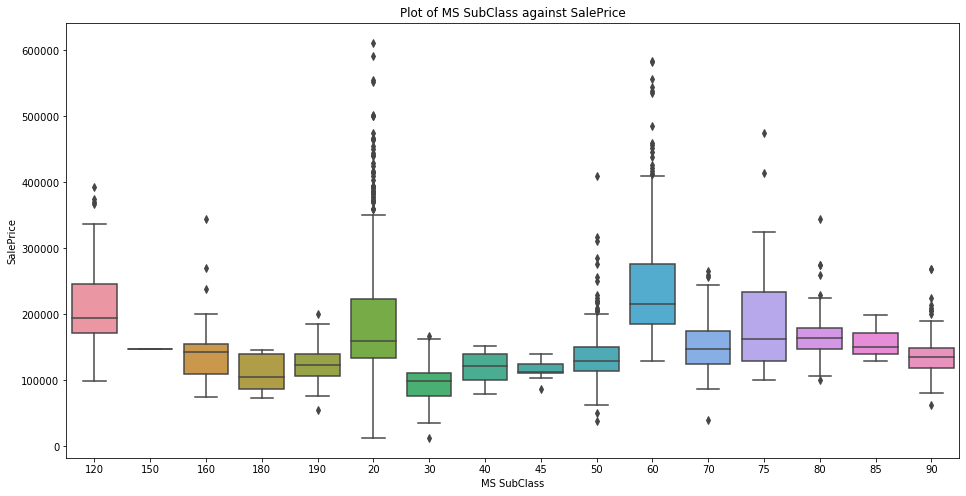

In [26]:
x_size = len(ex_nom['MS SubClass'].value_counts())
y_size = x_size/2
plt.figure(figsize=(x_size,y_size))
sns.boxplot(x=ex_nom['MS SubClass'].sort_values(ascending=False), y=ex_nom['SalePrice'])
plt.title("Plot of {} against SalePrice".format('MS SubClass'))

Text(0.5, 1.0, 'Plot of Lot Shape against SalePrice')

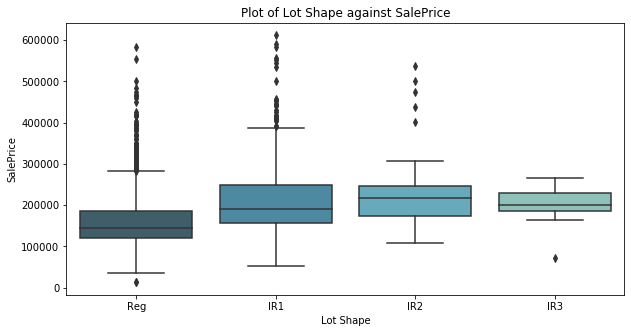

In [27]:
i = 'Lot Shape'

x_size = len(ex_nom[i].value_counts())*2.5
y_size = x_size/2
plt.figure(figsize=(x_size,y_size))
sns.boxplot(x=ex_nom[i], y=ex_nom['SalePrice'], order = ['Reg','IR1','IR2','IR3'],palette="GnBu_d")
plt.title("Plot of {} against SalePrice".format(i))

Text(0.5, 1.0, 'Plot of Neighborhood against SalePrice')

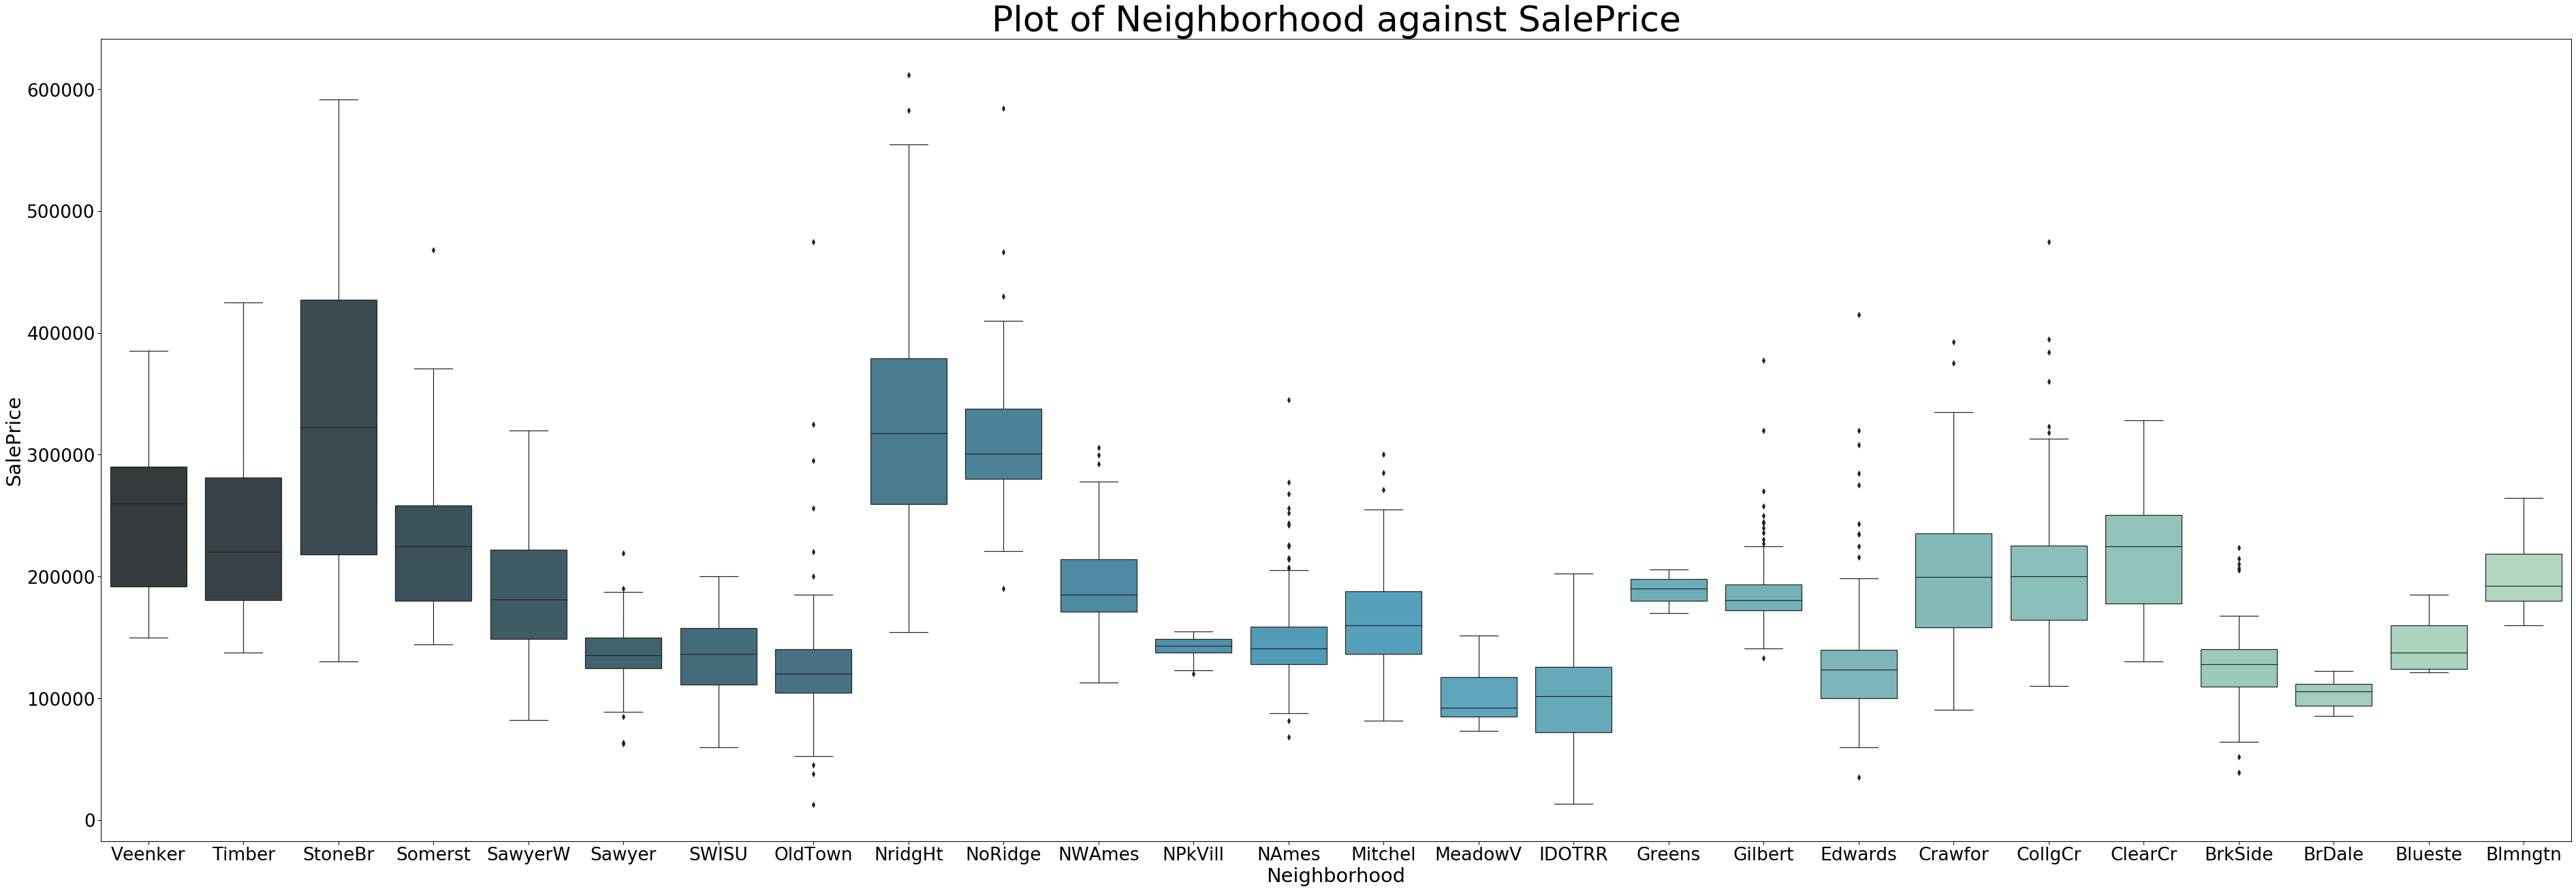

In [28]:
i = 'Neighborhood'

x_size = len(ex_nom[i].value_counts())*2.5
y_size = x_size/3
sns.set_context("paper", font_scale=3)
plt.figure(figsize=(x_size,y_size))
ax = sns.boxplot(x=ex_nom[i], y=ex_nom['SalePrice'], order = sorted(ex_nom[i].unique(),reverse = True),palette="GnBu_d")
ax.set_title("Plot of {} against SalePrice".format(i),fontsize = len(ex_nom[i].value_counts())*2)

In [29]:
ex_nom.columns[3]

'House Style'

Text(0.5, 1.0, 'Plot of House Style against SalePrice')

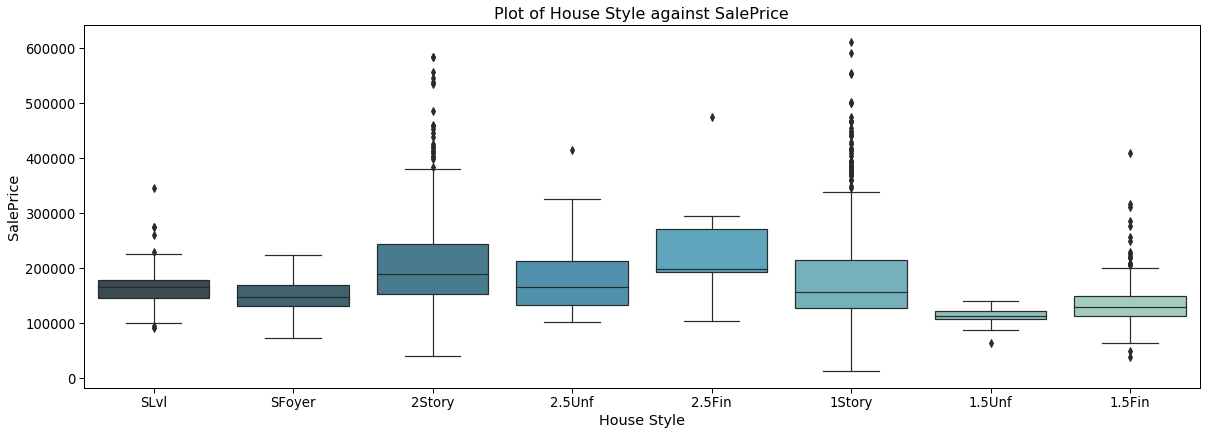

In [30]:
i = ex_nom.columns[3]

x_size = len(ex_nom[i].value_counts())*2.5
y_size = x_size/3
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(x_size,y_size))
ax = sns.boxplot(x=ex_nom[i], y=ex_nom['SalePrice'], order = sorted(ex_nom[i].unique(),reverse = True),palette="GnBu_d")
ax.set_title("Plot of {} against SalePrice".format(i),fontsize = len(ex_nom[i].value_counts())*2)

Text(0.5, 1.0, 'Plot of Exterior 1st against SalePrice')

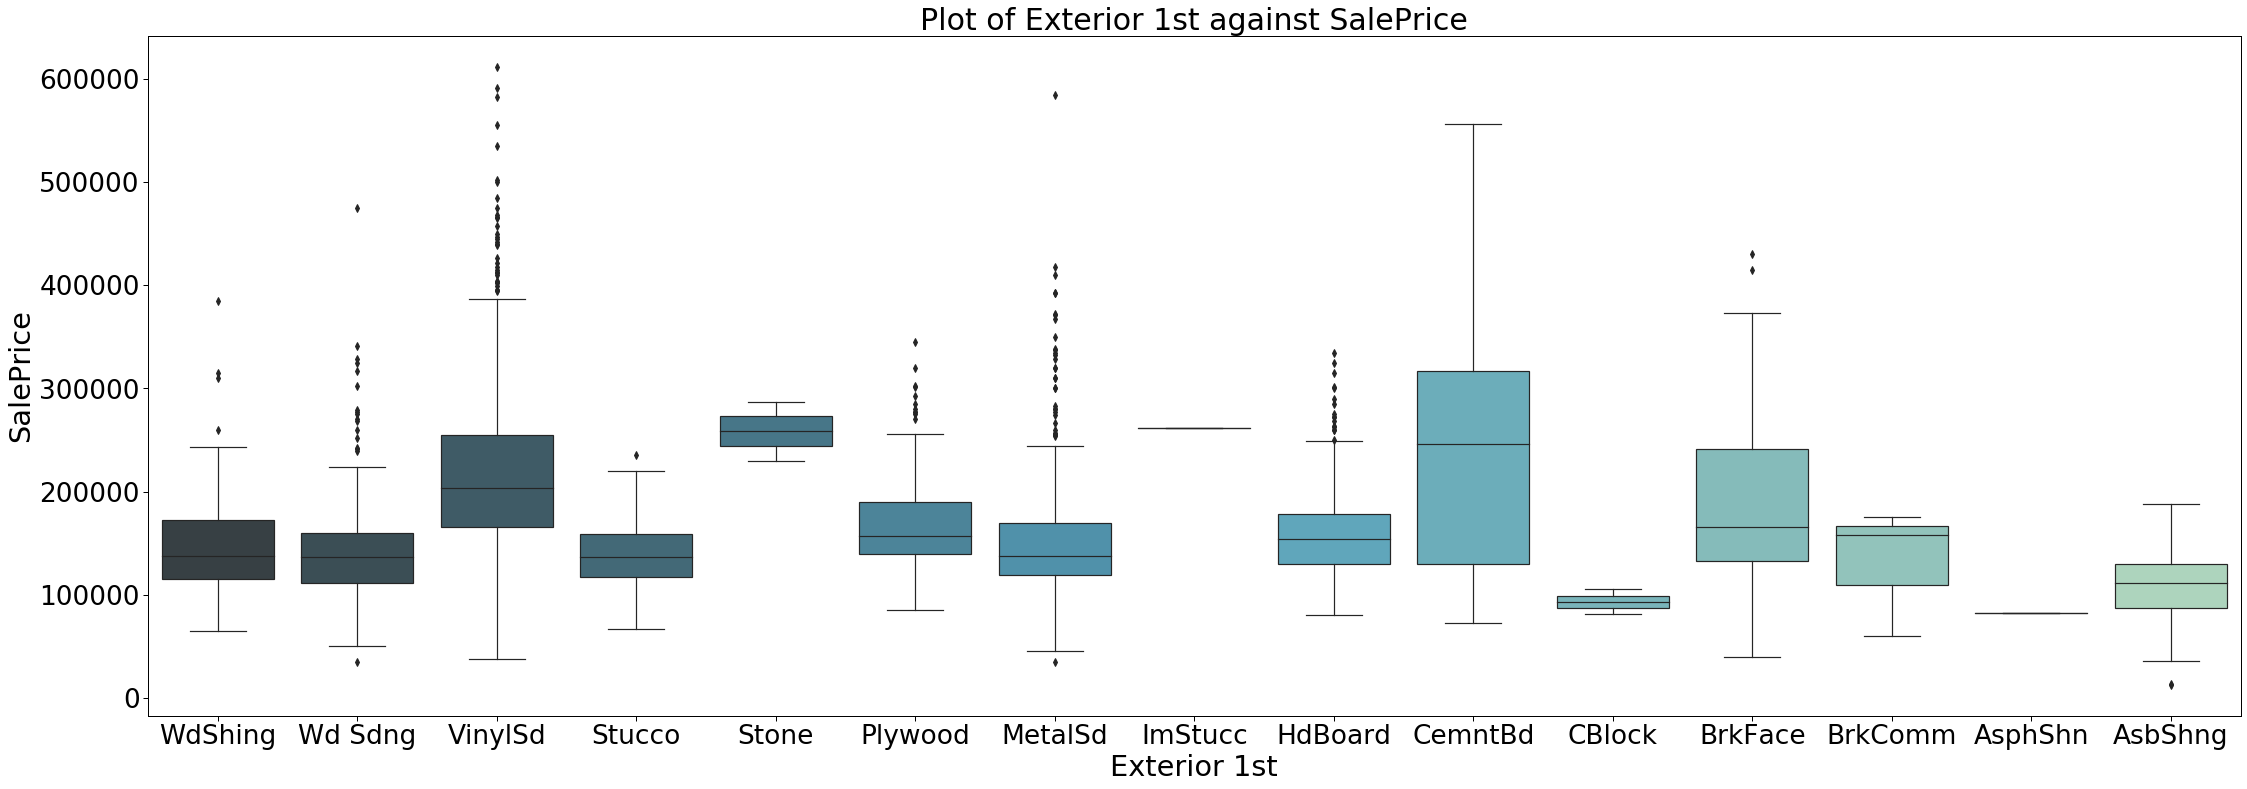

In [31]:
i = ex_nom.columns[4]

x_size = len(ex_nom[i].value_counts())*2.5
y_size = x_size/3
sns.set_context("paper", font_scale=3)
plt.figure(figsize=(x_size,y_size))
ax = sns.boxplot(x=ex_nom[i], y=ex_nom['SalePrice'], order = sorted(ex_nom[i].unique(),reverse = True),palette="GnBu_d")
ax.set_title("Plot of {} against SalePrice".format(i),fontsize = len(ex_nom[i].value_counts())*2)

Text(0.5, 1.0, 'Plot of Exterior 2nd against SalePrice')

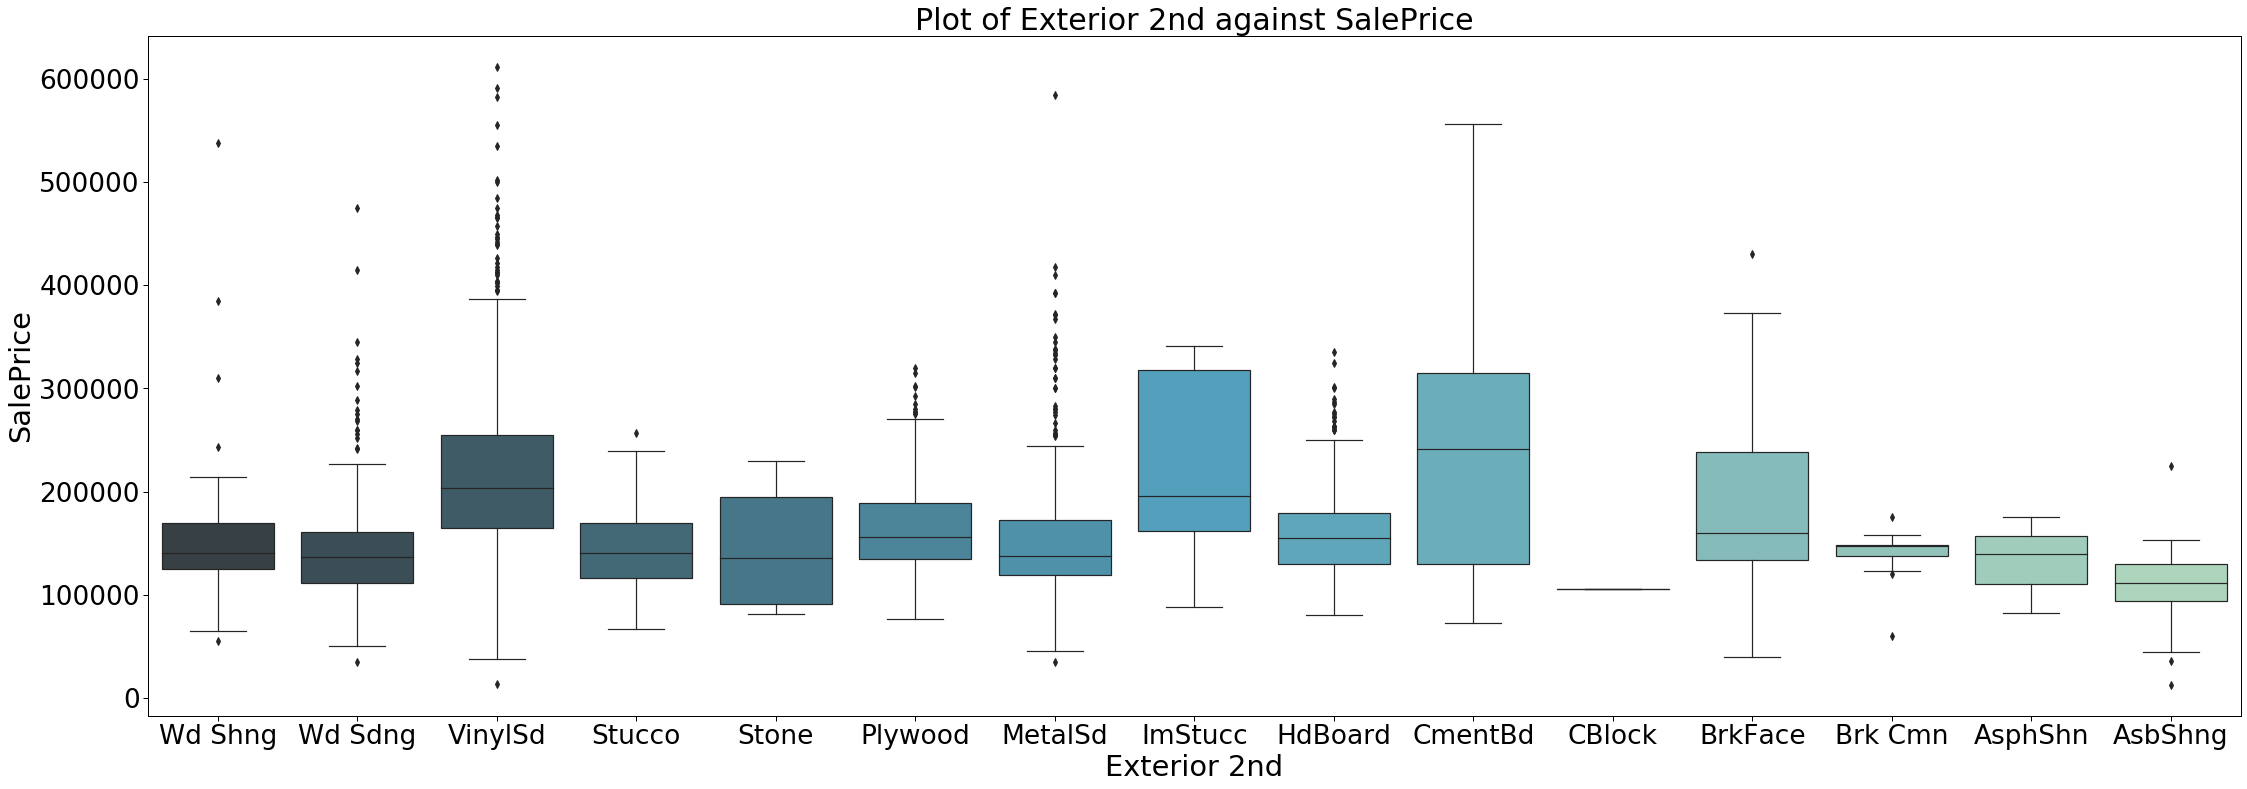

In [32]:
i = ex_nom.columns[5]

x_size = len(ex_nom[i].value_counts())*2.5
y_size = x_size/3
sns.set_context("paper", font_scale=3)
plt.figure(figsize=(x_size,y_size))
ax = sns.boxplot(x=ex_nom[i], y=ex_nom['SalePrice'], order = sorted(ex_nom[i].unique(),reverse = True), palette="GnBu_d")
ax.set_title("Plot of {} against SalePrice".format(i),fontsize = len(ex_nom[i].value_counts())*2)

In [33]:
(len(ex_nom[ex_nom['Exterior 1st'] == ex_nom['Exterior 2nd']])/len(ex_nom))*100

84.61538461538461

In [34]:
ex_nom['Exterior'] = np.where(ex_nom['Exterior 1st'] == ex_nom['Exterior 2nd'], 1, 2)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Plot of Exterior against SalePrice')

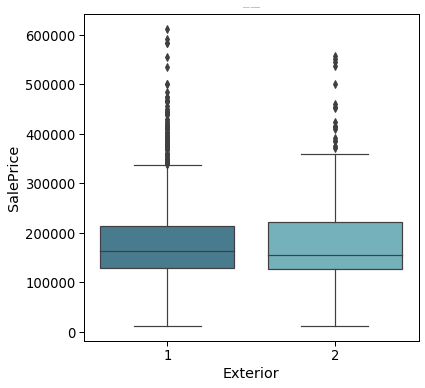

In [35]:
i = 'Exterior'

x_size = len(ex_nom[i].value_counts())*3
y_size = x_size
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(x_size,y_size))
ax = sns.boxplot(x=ex_nom[i], y=ex_nom['SalePrice'],palette="GnBu_d")
ax.set_title("Plot of {} against SalePrice".format(i),fontsize = len(ex_nom[i].value_counts())*0.2)

    Since the median price for both is reletively the same, we cannot rank them. However, we can consider them as nominal 
    variables

In [36]:
ex_nom[ex_nom.columns[6]].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

Text(0.5, 1.0, 'Plot of Mas Vnr Type against SalePrice')

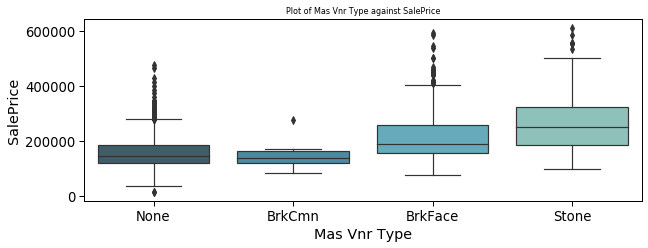

In [37]:
i = ex_nom.columns[6]

x_size = len(ex_nom[i].value_counts())*2.5
y_size = x_size/3
plt.figure(figsize=(x_size,y_size))
ax = sns.boxplot(x=ex_nom[i], y=ex_nom['SalePrice'], order = ['None','BrkCmn','BrkFace','Stone'],palette="GnBu_d")
ax.set_title("Plot of {} against SalePrice".format(i),fontsize = len(ex_nom[i].value_counts())*2)

In [38]:
ex_nom[ex_nom.columns[7]].unique()

array(['CBlock', 'PConc', 'BrkTil', 'Slab', 'Stone', 'Wood'], dtype=object)

Text(0.5, 1.0, 'Plot of Foundation against SalePrice')

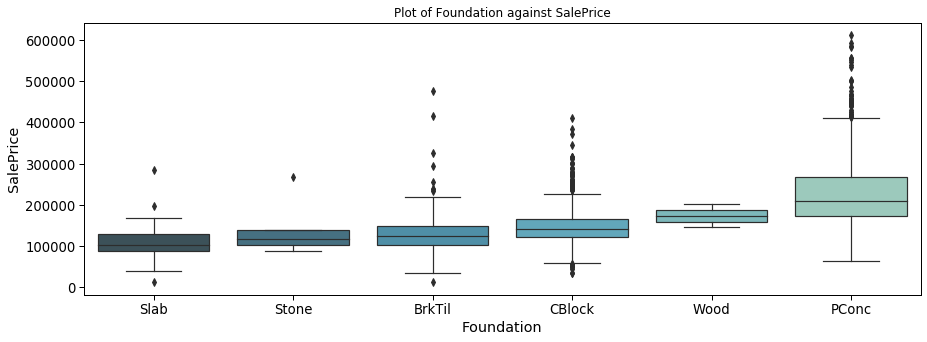

In [39]:
i = ex_nom.columns[7]

x_size = len(ex_nom[i].value_counts())*2.5
y_size = x_size/3
plt.figure(figsize=(x_size,y_size))
ax = sns.boxplot(x=ex_nom[i], y=ex_nom['SalePrice'],palette="GnBu_d", order = ['Slab','Stone','BrkTil','CBlock','Wood','PConc'])
ax.set_title("Plot of {} against SalePrice".format(i),fontsize = len(ex_nom[i].value_counts())*2)

In [40]:
ex_nom[ex_nom.columns[8]].unique()

array(['3', '4', '2', '5', '1', '0', '6', '8'], dtype=object)

Text(0.5, 1.0, 'Plot of Bedroom AbvGr against SalePrice')

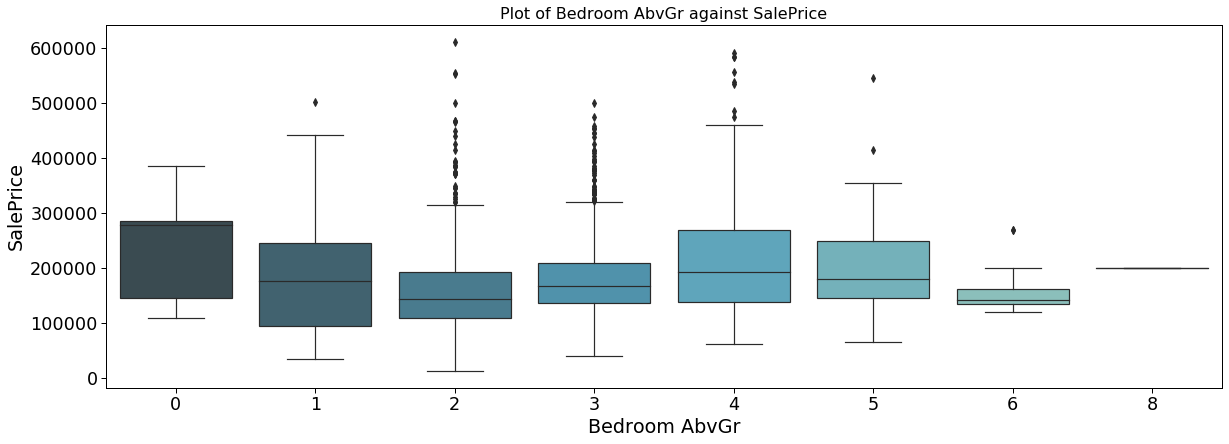

In [41]:
i = ex_nom.columns[8]

x_size = len(ex_nom[i].value_counts())*2.5
y_size = x_size/3
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(x_size,y_size))
ax = sns.boxplot(x=ex_nom[i], y=ex_nom['SalePrice'],palette="GnBu_d")
ax.set_title("Plot of {} against SalePrice".format(i),fontsize = len(ex_nom[i].value_counts())*2)

In [42]:
ex_nom[ex_nom.columns[9]].unique()

array(['6', '8', '5', '7', '9', '4', '12', '11', '10', '3', '14', '2',
       '13'], dtype=object)

Text(0.5, 1.0, 'Plot of TotRms AbvGrd against SalePrice')

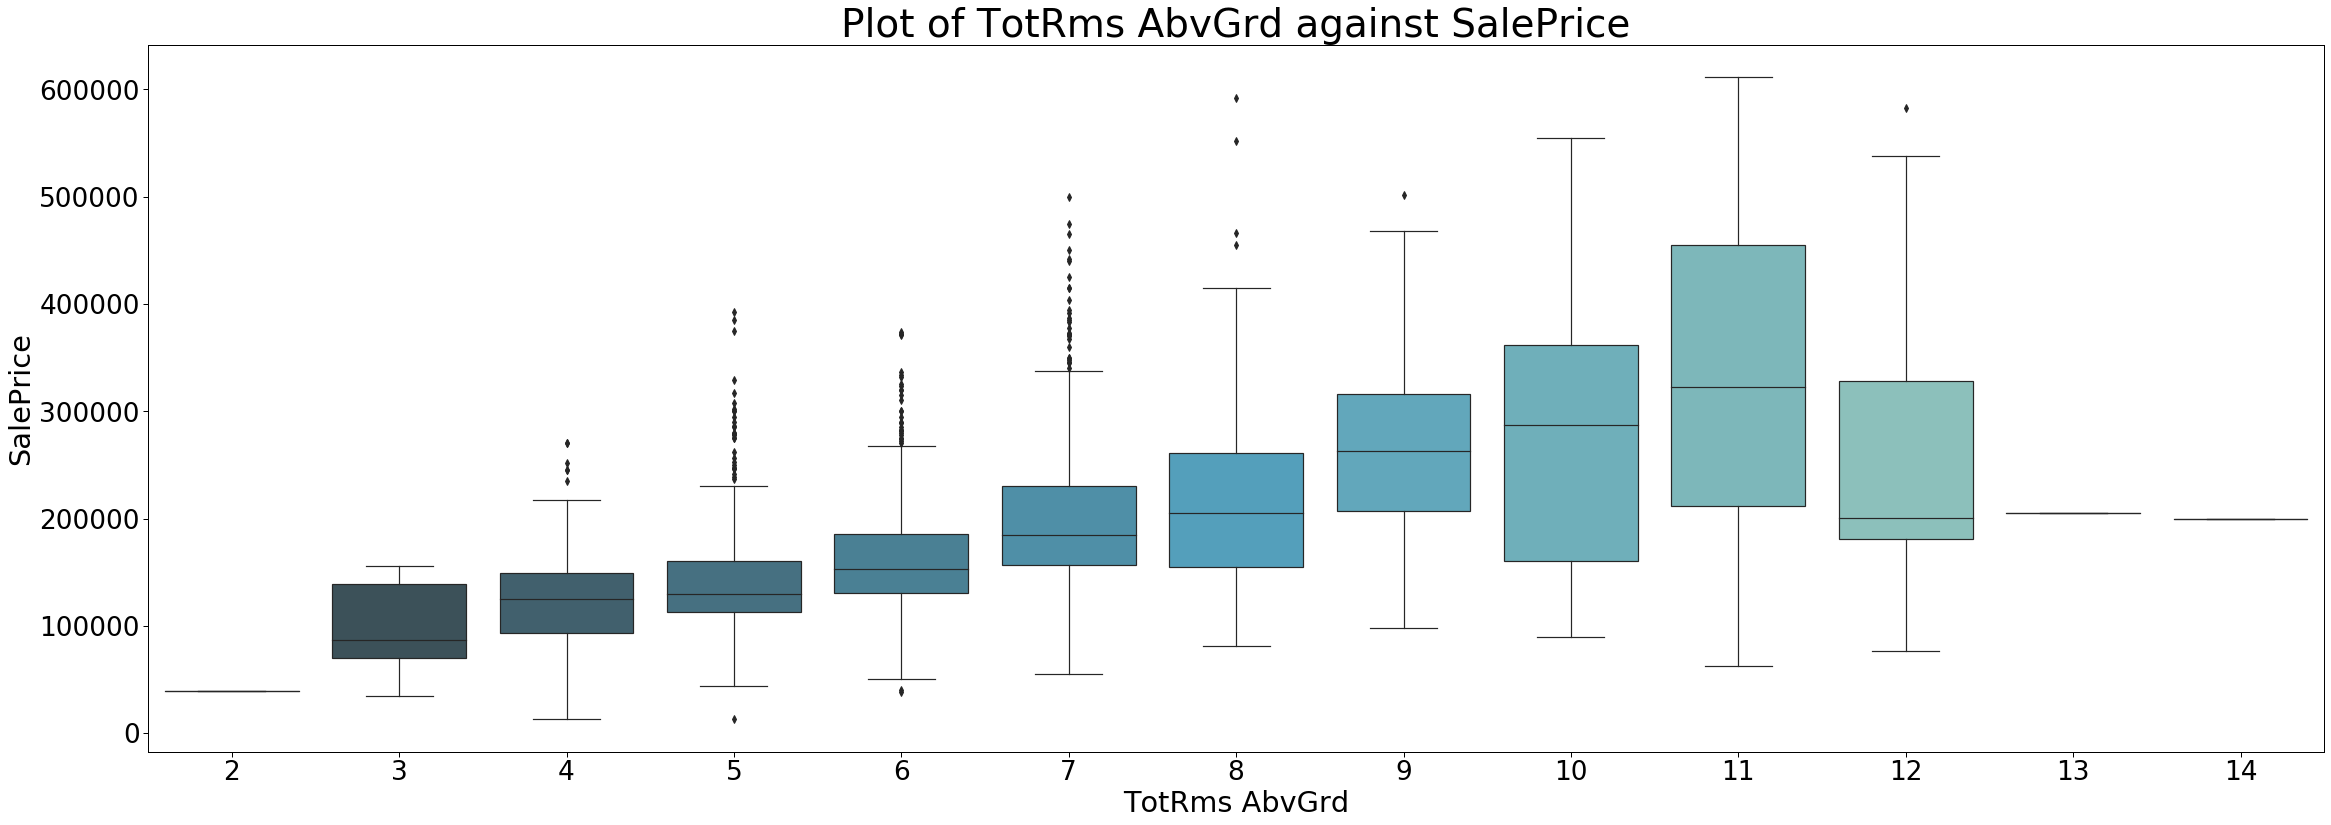

In [43]:
i = ex_nom.columns[9]

x_size = len(ex_nom[i].value_counts())*3
y_size = x_size/3
sns.set_context("paper", font_scale=3)
plt.figure(figsize=(x_size,y_size))
ax = sns.boxplot(x=ex_nom[i], y=ex_nom['SalePrice'],palette="GnBu_d",order = ['2','3','4','5','6','7','8','9','10','11','12','13','14'])
ax.set_title("Plot of {} against SalePrice".format(i),fontsize = len(ex_nom[i].value_counts())*3)

In [44]:
ex_nom[ex_nom.columns[9]].value_counts()

6     595
7     474
5     404
8     227
4     145
9      98
10     49
11     22
12     12
3      12
2       1
13      1
14      1
Name: TotRms AbvGrd, dtype: int64

In [45]:
ex_nom[ex_nom.columns[10]].unique()

array(['0', '1', '2', '4', '3'], dtype=object)

Text(0.5, 1.0, 'Plot of Fireplaces against SalePrice')

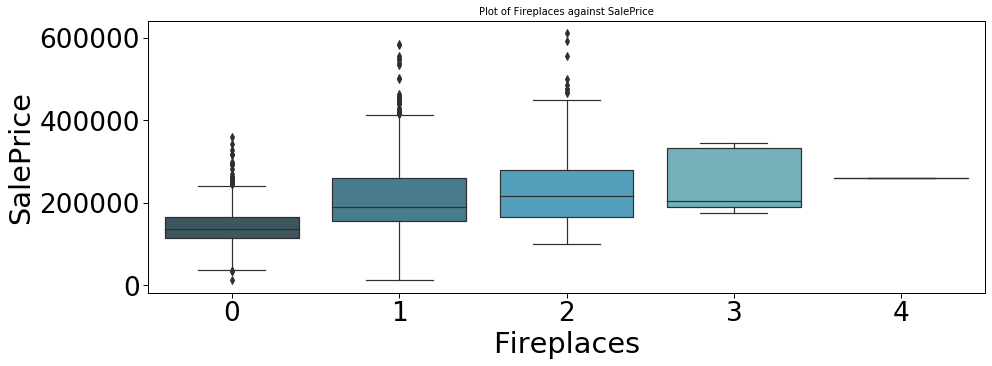

In [46]:
i = ex_nom.columns[10]

x_size = len(ex_nom[i].value_counts())*3
y_size = x_size/3
plt.figure(figsize=(x_size,y_size))
ax = sns.boxplot(x=ex_nom[i], y=ex_nom['SalePrice'],palette="GnBu_d",order = sorted(ex_nom[i].unique()))
ax.set_title("Plot of {} against SalePrice".format(i),fontsize = len(ex_nom[i].value_counts())*2)

In [47]:
ex_nom[ex_nom.columns[10]].value_counts()

0    995
1    895
2    145
3      5
4      1
Name: Fireplaces, dtype: int64

In [48]:
ex_nom[ex_nom.columns[11]].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'No Garage', '2Types',
       'CarPort'], dtype=object)

Text(0.5, 1.0, 'Plot of Garage Type against SalePrice')

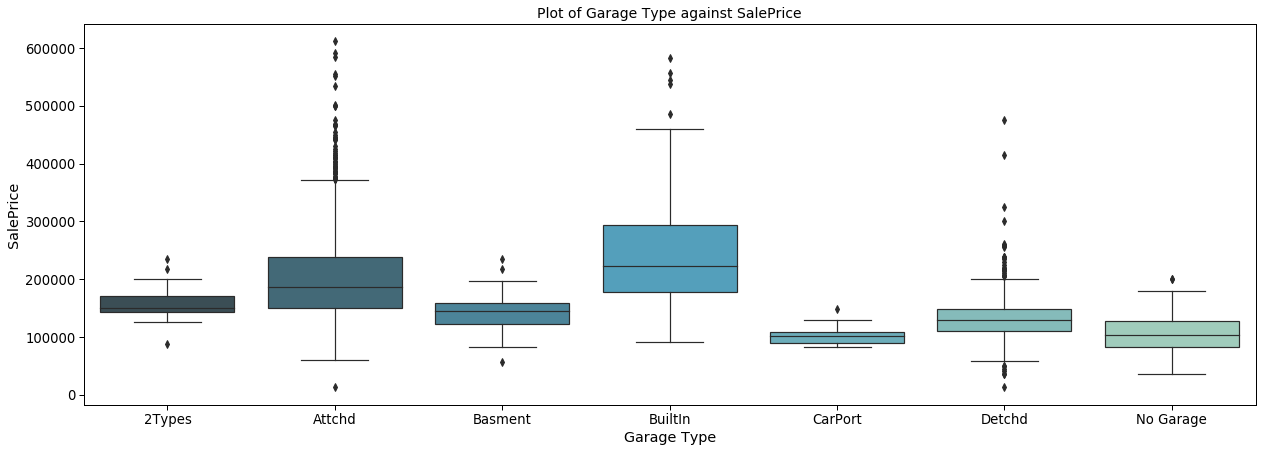

In [49]:
i = ex_nom.columns[11]

x_size = len(ex_nom[i].value_counts())*3
y_size = x_size/3
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(x_size,y_size))
ax = sns.boxplot(x=ex_nom[i], y=ex_nom['SalePrice'],palette="GnBu_d",order = sorted(ex_nom[i].unique()))
ax.set_title("Plot of {} against SalePrice".format(i),fontsize = len(ex_nom[i].value_counts())*2)

In [50]:
ex_nom[ex_nom.columns[12]].unique()

array(['RFn', 'Unf', 'Fin', 'No Garage'], dtype=object)

Text(0.5, 1.0, 'Plot of Garage Finish against SalePrice')

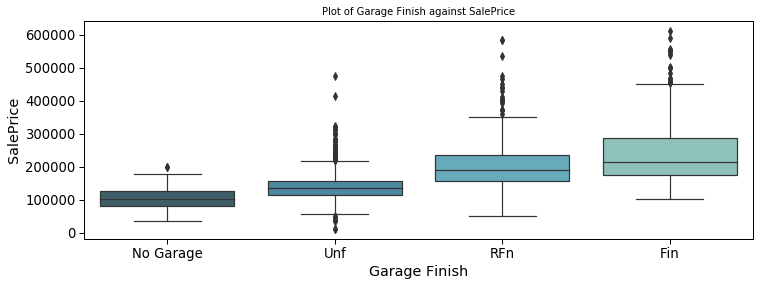

In [51]:
i = ex_nom.columns[12]

x_size = len(ex_nom[i].value_counts())*3
y_size = x_size/3
plt.figure(figsize=(x_size,y_size))
ax = sns.boxplot(x=ex_nom[i], y=ex_nom['SalePrice'],palette="GnBu_d",order = ['No Garage','Unf','RFn','Fin'])
ax.set_title("Plot of {} against SalePrice".format(i),fontsize = len(ex_nom[i].value_counts())*2.5)

In [52]:
ex_nom[ex_nom.columns[13]].unique()

array(['2.0', '1.0', '3.0', '0.0', '4.0', '5.0'], dtype=object)

Text(0.5, 1.0, 'Plot of Garage Cars against SalePrice')

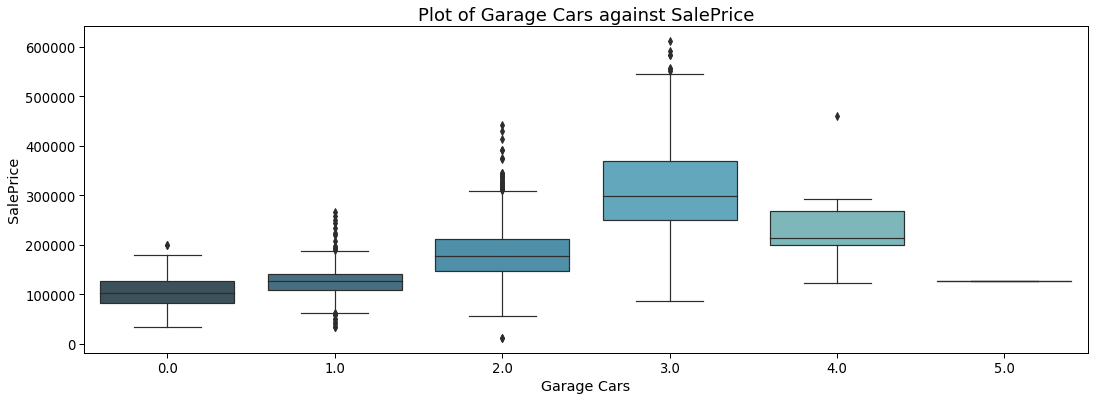

In [53]:
i = ex_nom.columns[13]

x_size = len(ex_nom[i].value_counts())*3
y_size = x_size/3
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(x_size,y_size))
ax = sns.boxplot(x=ex_nom[i], y=ex_nom['SalePrice'],palette="GnBu_d",order = sorted(ex_nom[i].unique()))
ax.set_title("Plot of {} against SalePrice".format(i),fontsize = len(ex_nom[i].value_counts())*3)

In [54]:
ex_nom[ex_nom.columns[13]].value_counts()

2.0    1132
1.0     521
3.0     261
0.0     113
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [55]:
ex_nom[ex_nom.columns[14]].unique()

array(['3', '4', '1', '6', '5', '9', '7', '2', '12', '10', '11', '8'],
      dtype=object)

Text(0.5, 1.0, 'Plot of Mo Sold against SalePrice')

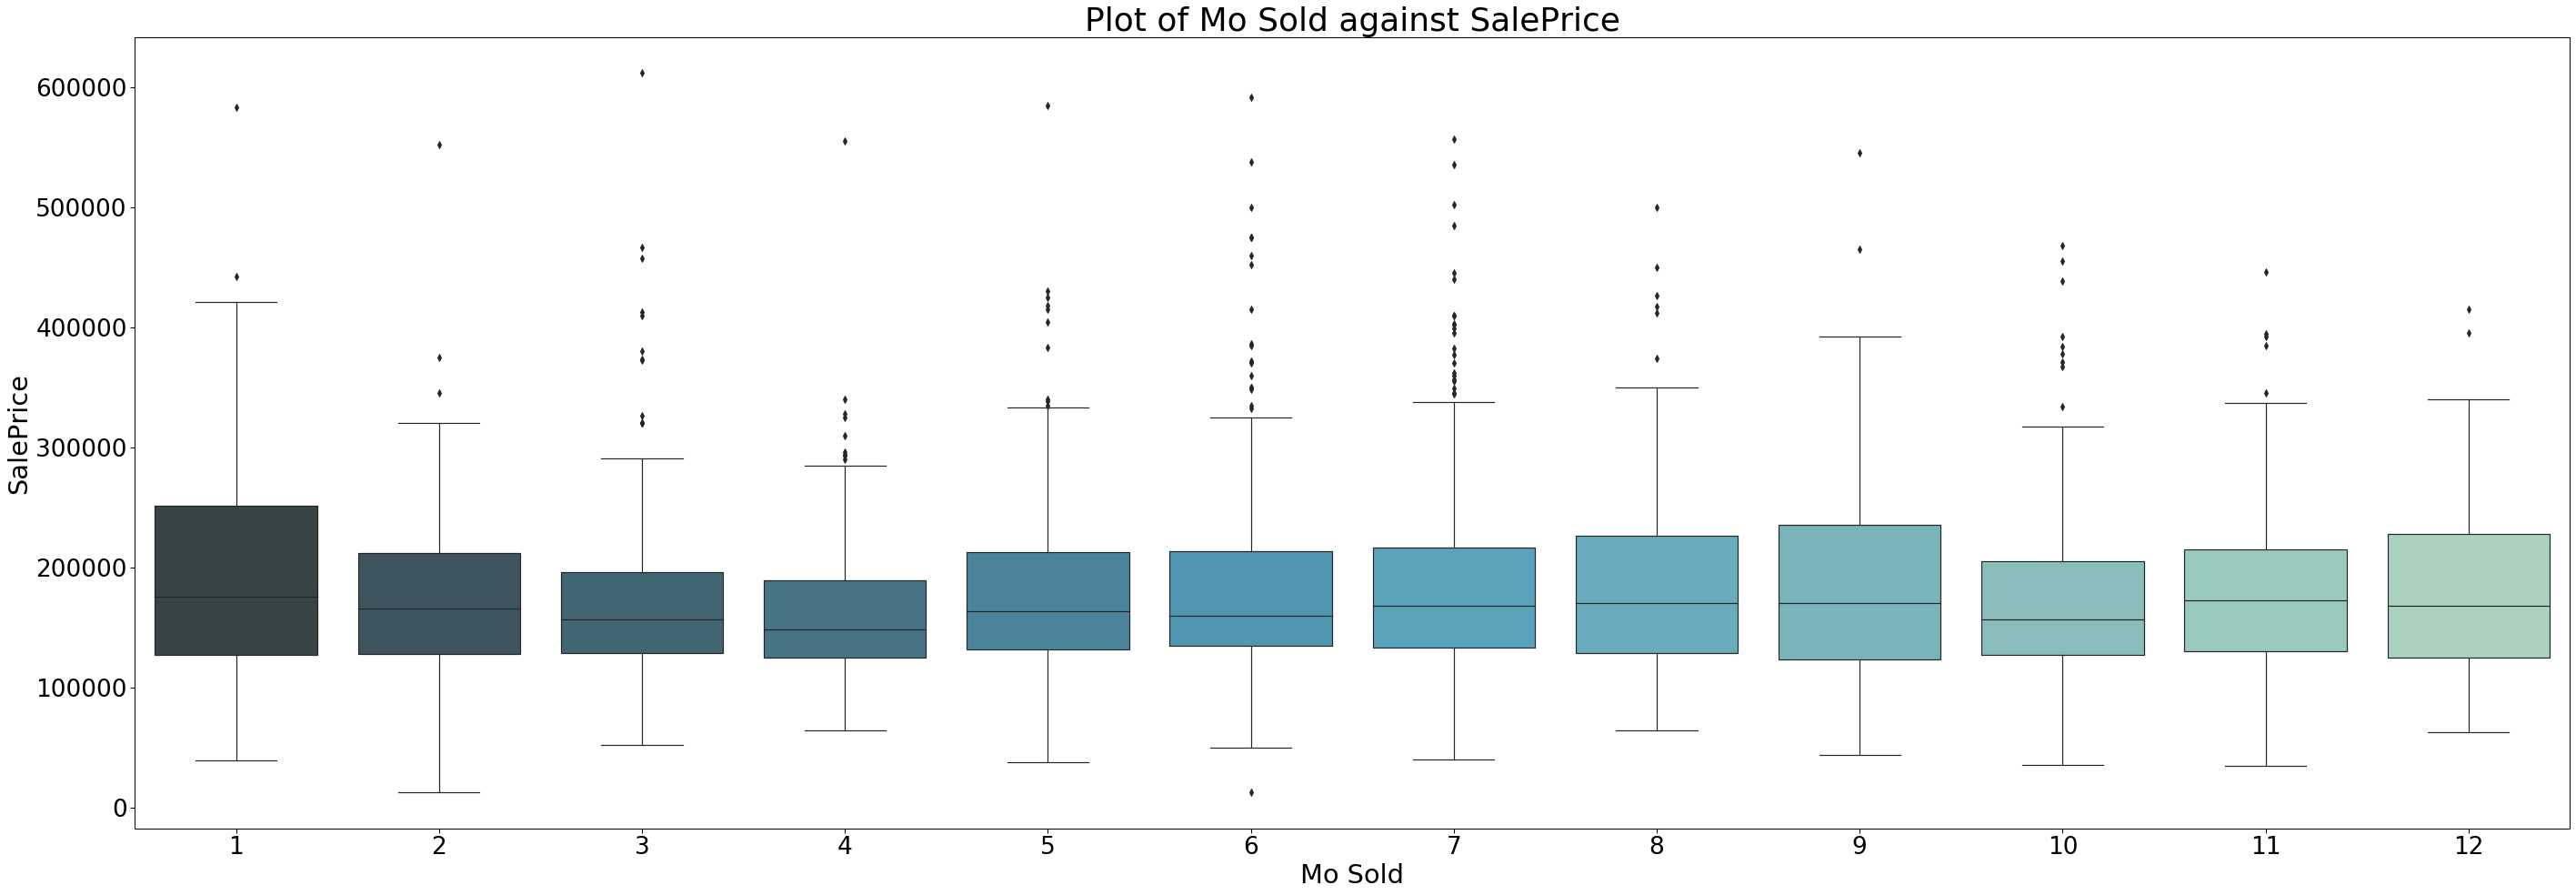

In [56]:
i = ex_nom.columns[14]

x_size = len(ex_nom[i].value_counts())*4
y_size = x_size/3
sns.set_context("paper", font_scale=3)
plt.figure(figsize=(x_size,y_size))
ax = sns.boxplot(x=ex_nom[i], y=ex_nom['SalePrice'],palette="GnBu_d",order = ['1','2','3','4','5','6','7','8','9','10','11','12'])
ax.set_title("Plot of {} against SalePrice".format(i),fontsize = len(ex_nom[i].value_counts())*3)

In [57]:
ex_nom[ex_nom.columns[15]].unique()

array(['1', '2', '6', '4', '5', '3'], dtype=object)

Text(0.5, 1.0, 'Plot of house age group against SalePrice')

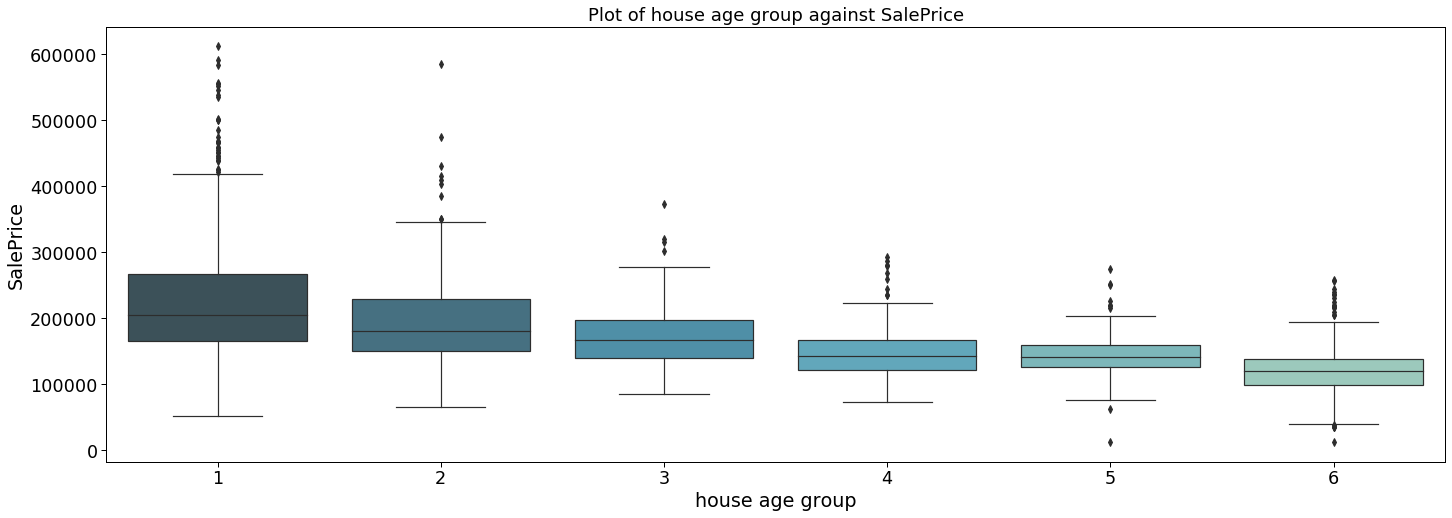

In [58]:
i = ex_nom.columns[15]

x_size = len(ex_nom[i].value_counts())*4
y_size = x_size/3
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(x_size,y_size))
ax = sns.boxplot(x=ex_nom[i], y=ex_nom['SalePrice'],palette="GnBu_d",order = sorted(ex_nom[i].unique()))
ax.set_title("Plot of {} against SalePrice".format(i),fontsize = len(ex_nom[i].value_counts())*3)

In [59]:
ex_nom[ex_nom.columns[16]].unique()

array(['2.5', '3.5', '2.0', '3.0', '1.0', '1.5', '4.5', '4.0', '6.0',
       '5.0', '7.0'], dtype=object)

Text(0.5, 1.0, 'Plot of total baths against SalePrice')

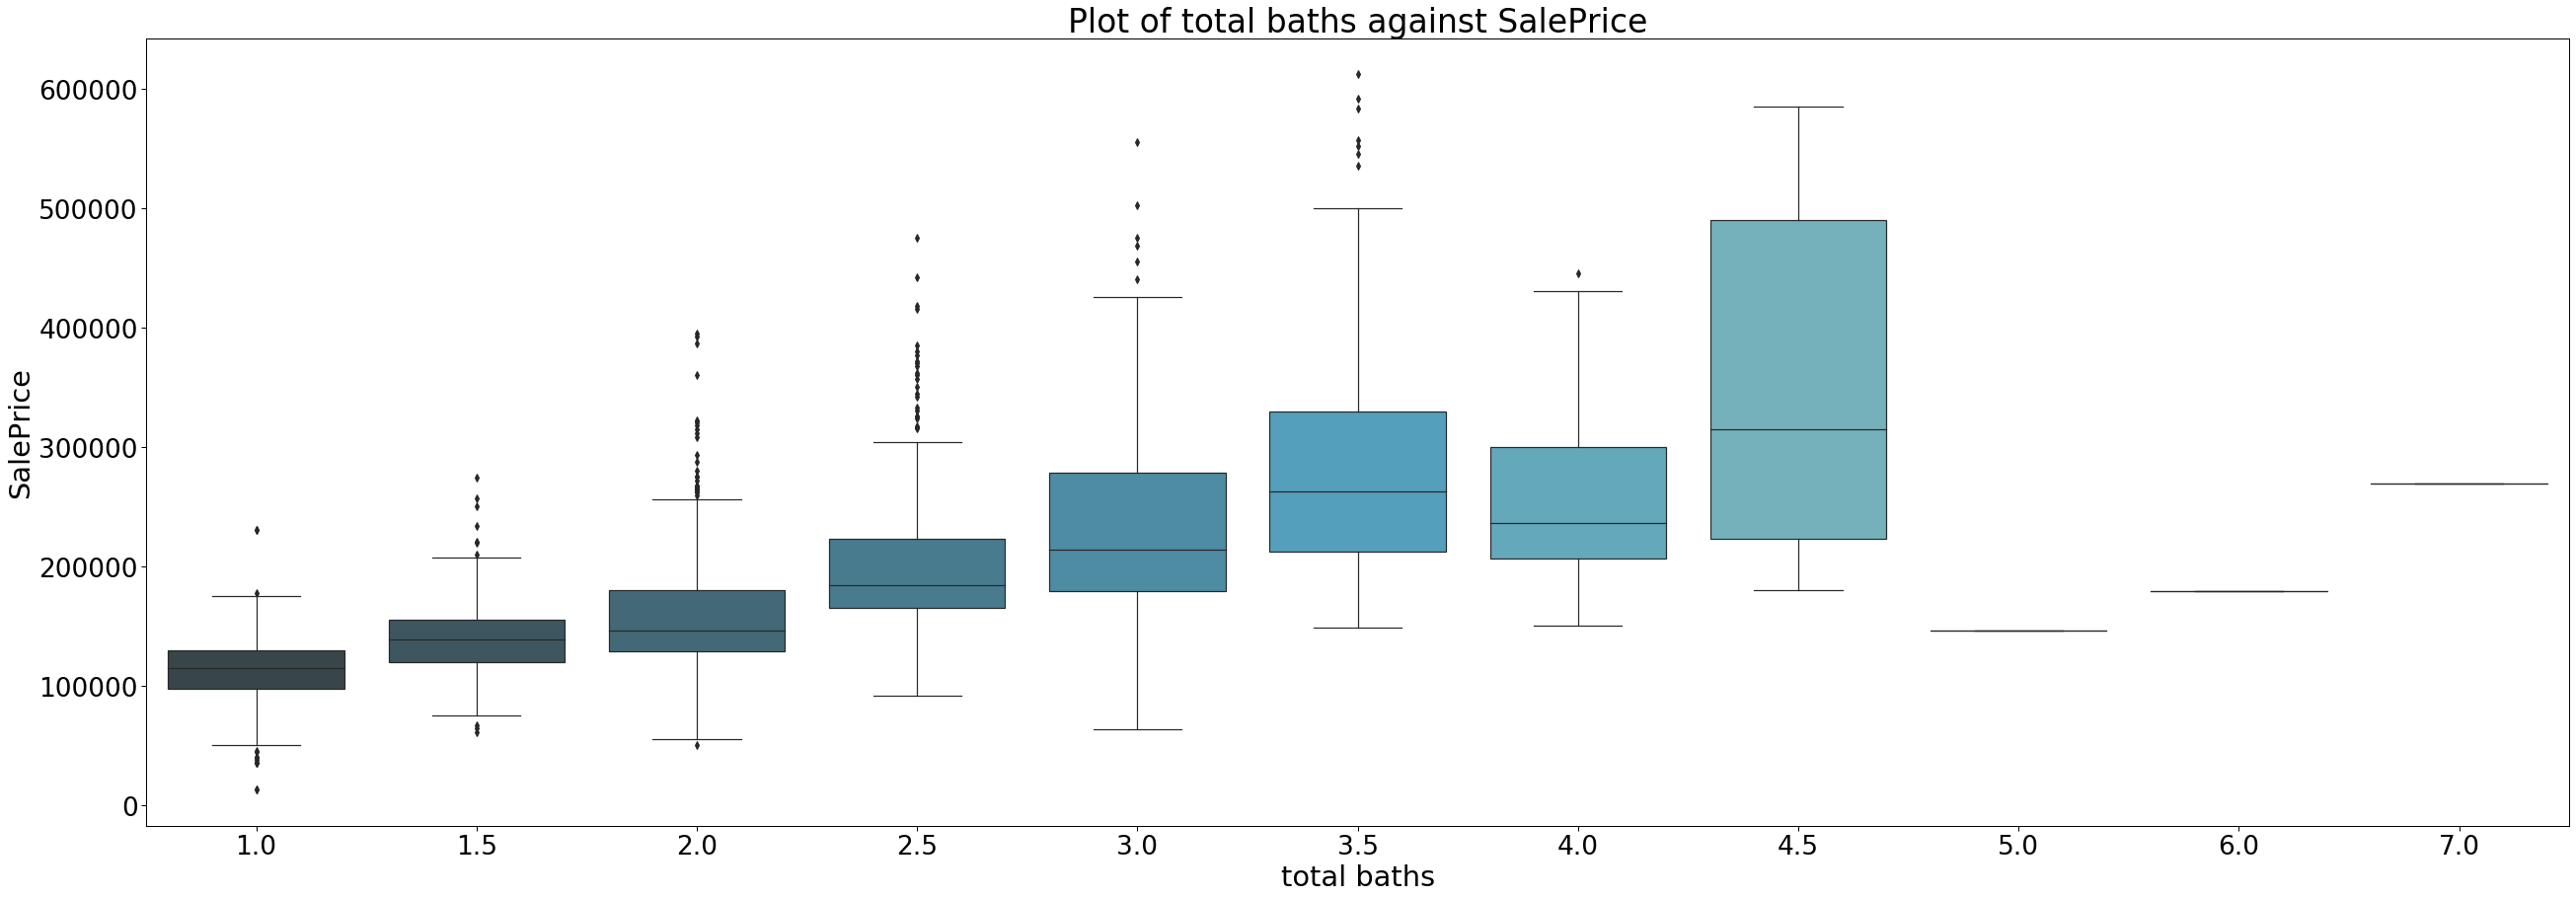

In [60]:
i = ex_nom.columns[16]

x_size = len(ex_nom[i].value_counts())*4
y_size = x_size/3
sns.set_context("paper", font_scale=3)
plt.figure(figsize=(x_size,y_size))
ax = sns.boxplot(x=ex_nom[i], y=ex_nom['SalePrice'],palette="GnBu_d",order = sorted(ex_nom[i].unique()))
ax.set_title("Plot of {} against SalePrice".format(i),fontsize = len(ex_nom[i].value_counts())*3)

In [61]:
ex_nom[ex_nom.columns[16]].value_counts()

2.0    633
2.5    388
1.0    314
3.0    277
3.5    200
1.5    193
4.0     21
4.5     10
7.0      2
6.0      2
5.0      1
Name: total baths, dtype: int64

    Nominal variables that can potentially be converted to ordinal variables:
        1. **Foundation** - ['Slab','Stone','BrkTil','CBlock','Wood','PConc']
        2. TotRms AbvGrd - ['3','4','5','6','7','8','9','10','11']
                2+3, 11+12+13_14
        3. Fireplaces - ['0','1','2']
                2+3+4
        4. Garage Finish - ['No Garage','Unf','RFn','Fin']
        5. **Garage Cars** - ['0.0','1.0','2.0','3.0']
                3+4+5
        6. **house age group** - ['6','5','4','3','2','1']
        7. **total baths** - ['1.0','1.5','2.0','2.5','3.0','3.5']
                3.5+4+4.5+5+6+7
                
     Above shows the variable name, the list of sub categories each has sorted from lowest weight to the highest weight. 
     As for the summmation values, those are categories whose values can be summed together as they are significantly small, thus will not carry any weight in the ranking

    Nominal variables in the final model include (and their frequency):
    - **total baths** x3
    - Neighborhood x3
    - **Garage Cars** x2
    - Garage Type
    - Mas Vnr Type 
    - Bedroom AbvGr 
    - **Foundation**
    - **house age group**
    - MS SubClass x3

    Depending on their frequency of occurance in the model and their coefficient ranking, of the 4 variables which overlap (**), I will be changing only two overlap nominal variable into ordinal variables. They are 
    - Foundation
    - house age group

    Convert selected nominal variables to ordinal via label encoding

In [62]:
convert_df = pd.DataFrame()

In [63]:
convert_df['Foundation'] = ex_nom['Foundation'].replace({'CBlock':4, 'PConc':6, 'BrkTil':3, 'Slab':1, 'Stone':2, 'Wood':5},inplace=True)
convert_df['house age group'] = ex_nom['house age group'].replace({'1':6, '2':5, '6':1, '4':3, '5':2, '3':4},inplace=True)
convert_df['TotRms AbvGrd'] = ex_nom['TotRms AbvGrd'].replace({'2':1,'3':1,'4':2,'5':3,'6':4,'7':5,'8':6,'9':7,'10':8,'11':9,'12':9,'13':9,'14':9},inplace=True)
convert_df['Fireplaces'] = ex_nom['Fireplaces'].replace({'0':0,'1':1,'2':2,'3':2,'4':2},inplace=True)
convert_df['Garage Finish'] = ex_nom['Garage Finish'].replace({'No Garage':0,'Unf':1,'RFn':2,'Fin':3},inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [64]:
ex_nom.head()

,MS SubClass,Lot Shape,Neighborhood,House Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Finish,Garage Cars,Mo Sold,house age group,total baths,SalePrice,Exterior
0,60,IR1,Sawyer,2Story,HdBoard,Plywood,BrkFace,4,3,4,0,Attchd,2,2.0,3,6,2.5,130500,2
1,60,IR1,SawyerW,2Story,VinylSd,VinylSd,BrkFace,6,4,6,1,Attchd,2,2.0,4,5,3.5,220000,1
2,20,Reg,NAmes,1Story,VinylSd,VinylSd,None,4,3,3,0,Detchd,1,1.0,1,6,2.0,109000,1
3,60,Reg,Timber,2Story,VinylSd,VinylSd,None,6,3,5,0,BuiltIn,3,2.0,4,6,2.5,174000,1
4,50,IR1,SawyerW,1.5Fin,Wd Sdng,Plywood,None,6,3,4,0,Detchd,1,2.0,3,5,2.0,138500,2


In [67]:
convert_df = ex_nom[['Foundation','house age group','TotRms AbvGrd','Fireplaces','Garage Finish']]

In [70]:
convert_df.head()

,Foundation,house age group,TotRms AbvGrd,Fireplaces,Garage Finish
0,4,6,4,0,2
1,6,5,6,1,2
2,4,6,3,0,1
3,6,6,5,0,3
4,6,5,4,0,1


In [71]:
ex_ord = pd.concat([ex_featuresdf.select_dtypes('int'),convert_df], axis = 1, sort = False)

In [72]:
ex_ord.head()

,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Fireplace Qu,Foundation,house age group,TotRms AbvGrd,Fireplaces,Garage Finish
0,6,4,3,4,0,4,6,4,0,2
1,7,4,4,4,3,6,5,6,1,2
2,5,3,3,4,0,4,6,3,0,1
3,5,3,4,3,0,6,6,5,0,3
4,6,3,2,3,0,6,5,4,0,1


In [75]:
ex_nom = ex_nom.drop(columns =['Foundation','house age group','TotRms AbvGrd','Fireplaces','Garage Finish'])

KeyError: "['Foundation' 'house age group' 'TotRms AbvGrd' 'Fireplaces'\n 'Garage Finish'] not found in axis"

In [77]:
ex_nom.head()

,MS SubClass,Lot Shape,Neighborhood,House Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Bedroom AbvGr,Garage Type,Garage Cars,Mo Sold,total baths,SalePrice,Exterior
0,60,IR1,Sawyer,2Story,HdBoard,Plywood,BrkFace,3,Attchd,2.0,3,2.5,130500,2
1,60,IR1,SawyerW,2Story,VinylSd,VinylSd,BrkFace,4,Attchd,2.0,4,3.5,220000,1
2,20,Reg,NAmes,1Story,VinylSd,VinylSd,None,3,Detchd,1.0,1,2.0,109000,1
3,60,Reg,Timber,2Story,VinylSd,VinylSd,None,3,BuiltIn,2.0,4,2.5,174000,1
4,50,IR1,SawyerW,1.5Fin,Wd Sdng,Plywood,None,3,Detchd,2.0,3,2.0,138500,2


    One hot encode nominal data

In [78]:
ex_nom.columns

Index(['MS SubClass', 'Lot Shape', 'Neighborhood', 'House Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Bedroom AbvGr',
       'Garage Type', 'Garage Cars', 'Mo Sold', 'total baths', 'SalePrice',
       'Exterior'],
      dtype='object')

In [82]:
ex_nom = ex_nom[['MS SubClass', 'Lot Shape', 'Neighborhood', 'House Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Bedroom AbvGr',
       'Garage Type', 'Garage Cars', 'Mo Sold', 'total baths', 'Exterior','SalePrice']]

In [83]:
ex_nomd = pd.get_dummies(ex_nom,columns=ex_nom.columns[:-1])

In [84]:
ex_nomd.head()

,SalePrice,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Bedroom AbvGr_0,Bedroom AbvGr_1,Bedroom AbvGr_2,Bedroom AbvGr_3,Bedroom AbvGr_4,Bedroom AbvGr_5,Bedroom AbvGr_6,Bedroom AbvGr_8,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_No Garage,Garage Cars_0.0,Garage Cars_1.0,Garage Cars_2.0,Garage Cars_3.0,Garage Cars_4.0,Garage Cars_5.0,Mo Sold_1,Mo Sold_10,Mo Sold_11,Mo Sold_12,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,total baths_1.0,total baths_1.5,total baths_2.0,total baths_2.5,total baths_3.0,total baths_3.5,total baths_4.0,total baths_4.5,total baths_5.0,total baths_6.0,total baths_7.0,Exterior_1,Exterior_2
0,130500,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,220000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,109000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,174000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,138500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [87]:
features = pd.concat([ex_featuresdf.select_dtypes('float'),ex_ord,ex_nomd], axis = 1, sort = False)

In [157]:
ex_cont = ex_featuresdf.select_dtypes('float')

In [158]:
ex_cont.head()

,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area
0,289.0,725.0,725.0,1479.0,475.0
1,132.0,913.0,913.0,2122.0,559.0
2,0.0,1057.0,1057.0,1057.0,246.0
3,0.0,384.0,744.0,1444.0,400.0
4,0.0,676.0,831.0,1445.0,484.0


In [90]:
features = features.drop(columns='SalePrice')

In [92]:
features.shape

(2041, 149)

#### 4. Model

In [93]:
X_train = features
y_train = target

In [94]:
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)

    Model with lasso to eliminate features

In [95]:
alpha_vals = np.logspace(-3,3,50)
lasso_cv = LassoCV(alphas=alpha_vals,cv=3)
lasso_cv.fit(X_train_ss,y_train)
best_alpha2 = lasso_cv.alpha_
best_alpha2

429.1934260128778

In [96]:
best_lasso = Lasso(alpha=best_alpha2)
cross_val_score(best_lasso,X_train_ss,y_train,cv=3).mean()

0.8914532970826844

In [97]:
lasso_model = Lasso(alpha = best_alpha2)

In [98]:
lasso_r2_mean = cross_val_score(lasso_model, X_train_ss, y_train, cv=3, scoring = 'r2').mean()
lasso_mse_mean = -cross_val_score(lasso_model, X_train_ss, y_train, cv=3, scoring = 'neg_mean_squared_error').mean()
print(lasso_r2_mean, lasso_mse_mean)

0.8914532970826844 683195930.8438708


In [99]:
lasso_model.fit(X_train_ss,y_train)

Lasso(alpha=429.1934260128778, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

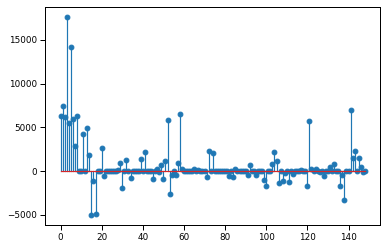

In [101]:
sns.set_context("paper", font_scale=1)
plt.stem(lasso_model.coef_)

#### 5. Extract features

In [102]:
coef = pd.Series(lasso_model.coef_, index = X_train.columns)

In [103]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 87 variables and eliminated the other 62 variables


In [104]:
coef[coef != 0].index

Index(['Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
       'Garage Area', 'Overall Qual', 'Exter Qual', 'Bsmt Qual',
       'Kitchen Qual', 'Foundation', 'house age group', 'Fireplaces',
       'Garage Finish', 'MS SubClass_120', 'MS SubClass_150',
       'MS SubClass_160', 'MS SubClass_180', 'MS SubClass_20',
       'MS SubClass_30', 'MS SubClass_40', 'MS SubClass_60', 'MS SubClass_80',
       'MS SubClass_85', 'MS SubClass_90', 'Lot Shape_IR2', 'Lot Shape_IR3',
       'Lot Shape_Reg', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'House Style_2.5Unf', 'House Style_SFoyer', 'Exte

(30,)


Text(0.5, 1.0, 'Coefficients in the Lasso Model for each variable')

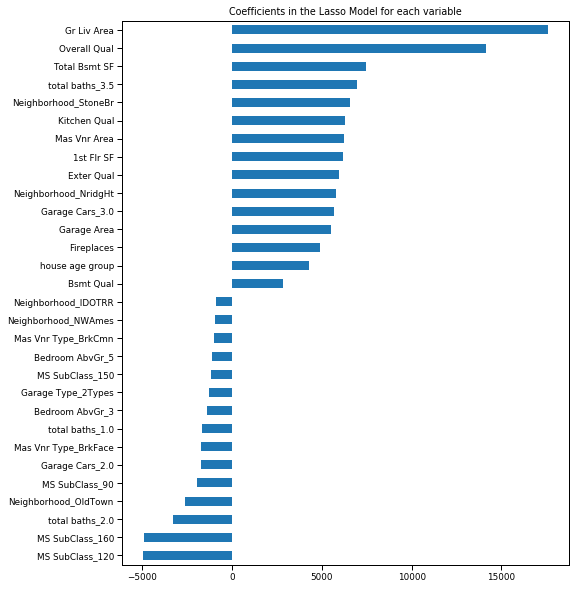

In [123]:
imp_coef = pd.concat([coef.sort_values().head(15),
                     coef.sort_values().tail(15)])
print(imp_coef.shape)
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model for each variable")

In [124]:
nex_features = imp_coef.index
nex_features.shape

(30,)

In [125]:
nex_features

Index(['MS SubClass_120', 'MS SubClass_160', 'total baths_2.0',
       'Neighborhood_OldTown', 'MS SubClass_90', 'Garage Cars_2.0',
       'Mas Vnr Type_BrkFace', 'total baths_1.0', 'Bedroom AbvGr_3',
       'Garage Type_2Types', 'MS SubClass_150', 'Bedroom AbvGr_5',
       'Mas Vnr Type_BrkCmn', 'Neighborhood_NWAmes', 'Neighborhood_IDOTRR',
       'Bsmt Qual', 'house age group', 'Fireplaces', 'Garage Area',
       'Garage Cars_3.0', 'Neighborhood_NridgHt', 'Exter Qual', '1st Flr SF',
       'Mas Vnr Area', 'Kitchen Qual', 'Neighborhood_StoneBr',
       'total baths_3.5', 'Total Bsmt SF', 'Overall Qual', 'Gr Liv Area'],
      dtype='object')

In [201]:
nex_features = ['MS SubClass_120', 'MS SubClass_160', 'total baths_2.0',
       'Neighborhood_OldTown', 'MS SubClass_90', 'Garage Cars_2.0',
       'Mas Vnr Type_BrkFace', 'total baths_1.0', 'Bedroom AbvGr_3',
       'Garage Type_2Types', 'Bedroom AbvGr_5',
       'Mas Vnr Type_BrkCmn', 'Neighborhood_NWAmes', 'Neighborhood_IDOTRR',
       'Bsmt Qual', 'house age group', 'Fireplaces', 'Garage Area',
       'Garage Cars_3.0', 'Neighborhood_NridgHt', 'Exter Qual', '1st Flr SF',
       'Mas Vnr Area', 'Kitchen Qual', 'Neighborhood_StoneBr',
       'total baths_3.5', 'Total Bsmt SF', 'Overall Qual', 'Gr Liv Area']

#### 6. Remodel

In [202]:
features_l1 = features[nex_features]
features_l1.shape

(2041, 29)

In [203]:
features_l1.head()

,MS SubClass_120,MS SubClass_160,total baths_2.0,Neighborhood_OldTown,MS SubClass_90,Garage Cars_2.0,Mas Vnr Type_BrkFace,total baths_1.0,Bedroom AbvGr_3,Garage Type_2Types,Bedroom AbvGr_5,Mas Vnr Type_BrkCmn,Neighborhood_NWAmes,Neighborhood_IDOTRR,Bsmt Qual,house age group,Fireplaces,Garage Area,Garage Cars_3.0,Neighborhood_NridgHt,Exter Qual,1st Flr SF,Mas Vnr Area,Kitchen Qual,Neighborhood_StoneBr,total baths_3.5,Total Bsmt SF,Overall Qual,Gr Liv Area
0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,3,6,0,475.0,0,0,4,725.0,289.0,4,0,0,725.0,6,1479.0
1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,4,5,1,559.0,0,0,4,913.0,132.0,4,0,1,913.0,7,2122.0
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,3,6,0,246.0,0,0,3,1057.0,0.0,4,0,0,1057.0,5,1057.0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,4,6,0,400.0,0,0,3,744.0,0.0,3,0,0,384.0,5,1444.0
4,0,0,1,0,0,1,0,0,1,0,0,0,0,0,2,5,0,484.0,0,0,3,831.0,0.0,3,0,0,676.0,6,1445.0


    1. Linear Regression

In [204]:
X_train_l1 = features_l1
y_train = target

In [205]:
ss = StandardScaler()
ss.fit(X_train_l1)
X_train_l1ss = ss.transform(X_train_l1)

In [206]:
lrl1 = LinearRegression()

In [207]:
cross_val_score(lrl1,X_train_l1ss, y_train, cv = 5).mean()

0.8915708377523754

    2. Regularise - ridge

In [208]:
alpha_vals = np.logspace(-3,3,50)
ridge_cv = RidgeCV(alphas = alpha_vals, cv=3)
ridge_cv.fit(X_train_l1ss,y_train)
best_alpha1l1 = ridge_cv.alpha_
best_alpha1l1

59.636233165946365

In [209]:
best_ridgel1 = Ridge(alpha=best_alpha1l1)
cross_val_score(best_ridgel1,X_train_l1ss,y_train,cv=3).mean()

0.8908947205966434

    3. Regularise - lasso

In [210]:
lasso_cv = LassoCV(alphas=alpha_vals,cv=3)
lasso_cv.fit(X_train_l1ss,y_train)
best_alpha2l1 = lasso_cv.alpha_
best_alpha2l1

44.98432668969444

In [211]:
best_lassol1 = Lasso(alpha=best_alpha2l1)
cross_val_score(best_lassol1,X_train_l1ss,y_train,cv=3).mean()

0.8906863482880563

    4. Regularise - elasticnet

In [212]:
elasticnet_cv = ElasticNetCV(alphas=alpha_vals,cv=5)
elasticnet_cv.fit(X_train_l1ss,y_train)
best_alpha3l1 = elasticnet_cv.alpha_
best_alpha3l1

0.06866488450043001

In [213]:
best_elasticnetl1 = ElasticNet(alpha=best_alpha3l1)
cross_val_score(best_elasticnetl1,X_train_l1ss,y_train,cv=3).mean()

0.8908873867218062

    My linear regression now performs the best, as such I will be using that to predict y_test

In [214]:
lr = LinearRegression()

In [215]:
lr.fit(X_train_l1ss,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [216]:
cross_val_score(lr,X_train_l1ss, y_train, cv = 5).mean()

0.8915708377523754

#### 7. Test data

In [217]:
nex_features

['MS SubClass_120',
 'MS SubClass_160',
 'total baths_2.0',
 'Neighborhood_OldTown',
 'MS SubClass_90',
 'Garage Cars_2.0',
 'Mas Vnr Type_BrkFace',
 'total baths_1.0',
 'Bedroom AbvGr_3',
 'Garage Type_2Types',
 'Bedroom AbvGr_5',
 'Mas Vnr Type_BrkCmn',
 'Neighborhood_NWAmes',
 'Neighborhood_IDOTRR',
 'Bsmt Qual',
 'house age group',
 'Fireplaces',
 'Garage Area',
 'Garage Cars_3.0',
 'Neighborhood_NridgHt',
 'Exter Qual',
 '1st Flr SF',
 'Mas Vnr Area',
 'Kitchen Qual',
 'Neighborhood_StoneBr',
 'total baths_3.5',
 'Total Bsmt SF',
 'Overall Qual',
 'Gr Liv Area']

In [218]:
print(len(nex_features))

sep = '_'
list_var = []
for i in nex_features:
    list_var.append(i.split(sep, 1)[0])

print(len(list_var))
list_var

29
29


['MS SubClass',
 'MS SubClass',
 'total baths',
 'Neighborhood',
 'MS SubClass',
 'Garage Cars',
 'Mas Vnr Type',
 'total baths',
 'Bedroom AbvGr',
 'Garage Type',
 'Bedroom AbvGr',
 'Mas Vnr Type',
 'Neighborhood',
 'Neighborhood',
 'Bsmt Qual',
 'house age group',
 'Fireplaces',
 'Garage Area',
 'Garage Cars',
 'Neighborhood',
 'Exter Qual',
 '1st Flr SF',
 'Mas Vnr Area',
 'Kitchen Qual',
 'Neighborhood',
 'total baths',
 'Total Bsmt SF',
 'Overall Qual',
 'Gr Liv Area']

In [219]:
list_varu = []
for i in list_var:
    if i not in list_varu:
        list_varu.append(i)

list_varu.remove('total baths')
list_varu.remove('house age group')

In [220]:
print(len(list_varu))
list_varu

16


['MS SubClass',
 'Neighborhood',
 'Garage Cars',
 'Mas Vnr Type',
 'Bedroom AbvGr',
 'Garage Type',
 'Bsmt Qual',
 'Fireplaces',
 'Garage Area',
 'Exter Qual',
 '1st Flr SF',
 'Mas Vnr Area',
 'Kitchen Qual',
 'Total Bsmt SF',
 'Overall Qual',
 'Gr Liv Area']

    1. Load test data

In [221]:
ames_test = pd.read_csv("./datasets/test.csv")
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [222]:
test_variables = ames_test[list_varu]
test_variables.head()

,MS SubClass,Neighborhood,Garage Cars,Mas Vnr Type,Bedroom AbvGr,Garage Type,Bsmt Qual,Fireplaces,Garage Area,Exter Qual,1st Flr SF,Mas Vnr Area,Kitchen Qual,Total Bsmt SF,Overall Qual,Gr Liv Area
0,190,OldTown,1,None,4,Detchd,Fa,0,440,TA,908,0.0,Fa,1020,6,1928
1,90,Sawyer,2,None,6,Attchd,Gd,0,580,TA,1967,0.0,TA,1967,5,1967
2,60,Gilbert,2,None,3,Attchd,Gd,1,426,Gd,664,0.0,Gd,654,7,1496
3,30,OldTown,2,None,2,Detchd,TA,0,480,Gd,968,0.0,TA,968,5,968
4,20,NAmes,2,BrkFace,3,Attchd,Gd,2,514,TA,1394,247.0,TA,1394,6,1394


    2. Clean data

In [223]:
def Get_null_vals(df):
    for null_values in df:
        df_null_values = df[null_values].isnull().sum()
        if df_null_values != 0:
            print(f'{null_values}: {df_null_values} null values')
            
Get_null_vals(test_variables)

Mas Vnr Type: 1 null values
Garage Type: 44 null values
Bsmt Qual: 25 null values
Mas Vnr Area: 1 null values


In [224]:
test_variables['Mas Vnr Type'].fillna('None',inplace=True)
test_variables['Mas Vnr Area'].fillna(0, inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [225]:
test_variables['Bsmt Qual'].fillna(0,inplace=True)

In [226]:
test_variables['Garage Type'].fillna('No Garage', inplace=True)

In [227]:
Get_null_vals(test_variables)

    3. Convert each variable to its associated data type

In [228]:
clean_ord_list = []
for i in test_variables.columns:
    if i in ex_ord.columns:
        clean_ord_list.append(i)
        
clean_ord_list

['Bsmt Qual', 'Fireplaces', 'Exter Qual', 'Kitchen Qual', 'Overall Qual']

In [229]:
test_variables[clean_ord_list].dtypes

Bsmt Qual       object
Fireplaces       int64
Exter Qual      object
Kitchen Qual    object
Overall Qual     int64
dtype: object

In [230]:
cat_dict = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
for i in test_variables[clean_ord_list].columns:
    if ('Overall' not in i) & ('Qual' in i):
        test_variables[i].replace(cat_dict,inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [231]:
test_variables[clean_ord_list].dtypes

Bsmt Qual       int64
Fireplaces      int64
Exter Qual      int64
Kitchen Qual    int64
Overall Qual    int64
dtype: object

In [232]:
for i in test_variables.columns:
    if i in ex_cont.columns:
        test_variables[i] = test_variables[i].astype('float')
    elif i in ex_ord.columns:
        test_variables[i] = test_variables[i].astype('int')
    elif i in ex_nom.columns:
        test_variables[i] = test_variables[i].astype('str')
        
test_variables.dtypes

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

MS SubClass       object
Neighborhood      object
Garage Cars       object
Mas Vnr Type      object
Bedroom AbvGr     object
Garage Type       object
Bsmt Qual          int32
Fireplaces         int32
Garage Area      float64
Exter Qual         int32
1st Flr SF       float64
Mas Vnr Area     float64
Kitchen Qual       int32
Total Bsmt SF    float64
Overall Qual       int32
Gr Liv Area      float64
dtype: object

In [233]:
test_variables['total baths'] = ames_test['Bsmt Full Bath'] + 0.5*ames_test['Bsmt Half Bath'] + ames_test['Full Bath'] + 0.5*ames_test['Half Bath']
test_variables['house age'] = ames_test['Yr Sold'] - ames_test['Year Remod/Add']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [234]:
test_variables['house age group'] = abs((test_variables['house age'] // 10)) + 1
test_variables['house age group'].replace(7,6,inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [235]:
test_variables.head()

,MS SubClass,Neighborhood,Garage Cars,Mas Vnr Type,Bedroom AbvGr,Garage Type,Bsmt Qual,Fireplaces,Garage Area,Exter Qual,1st Flr SF,Mas Vnr Area,Kitchen Qual,Total Bsmt SF,Overall Qual,Gr Liv Area,total baths,house age,house age group
0,190,OldTown,1,None,4,Detchd,2,0,440.0,3,908.0,0.0,2,1020.0,6,1928.0,2.0,56,6
1,90,Sawyer,2,None,6,Attchd,4,0,580.0,3,1967.0,0.0,3,1967.0,5,1967.0,2.0,29,3
2,60,Gilbert,2,None,3,Attchd,4,1,426.0,4,664.0,0.0,4,654.0,7,1496.0,3.5,0,1
3,30,OldTown,2,None,2,Detchd,3,0,480.0,4,968.0,0.0,3,968.0,5,968.0,1.0,1,1
4,20,NAmes,2,BrkFace,3,Attchd,4,2,514.0,3,1394.0,247.0,3,1394.0,6,1394.0,2.5,46,5


In [236]:
test_variables['house age group'] = test_variables['house age group'].astype('int')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [237]:
test_variables['house age group'] = test_variables['house age group'].replace({1:6, 2:5, 6:1, 4:3, 5:2, 3:4})

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [238]:
test_variables.head()

,MS SubClass,Neighborhood,Garage Cars,Mas Vnr Type,Bedroom AbvGr,Garage Type,Bsmt Qual,Fireplaces,Garage Area,Exter Qual,1st Flr SF,Mas Vnr Area,Kitchen Qual,Total Bsmt SF,Overall Qual,Gr Liv Area,total baths,house age,house age group
0,190,OldTown,1,None,4,Detchd,2,0,440.0,3,908.0,0.0,2,1020.0,6,1928.0,2.0,56,1
1,90,Sawyer,2,None,6,Attchd,4,0,580.0,3,1967.0,0.0,3,1967.0,5,1967.0,2.0,29,4
2,60,Gilbert,2,None,3,Attchd,4,1,426.0,4,664.0,0.0,4,654.0,7,1496.0,3.5,0,6
3,30,OldTown,2,None,2,Detchd,3,0,480.0,4,968.0,0.0,3,968.0,5,968.0,1.0,1,6
4,20,NAmes,2,BrkFace,3,Attchd,4,2,514.0,3,1394.0,247.0,3,1394.0,6,1394.0,2.5,46,2


    One hot encode nominal variables

In [239]:
testvar_to_dummy = []
for i in test_variables.columns:
    if i in ex_nom:
        testvar_to_dummy.append(i)
        
testvar_to_dummy

['MS SubClass',
 'Neighborhood',
 'Garage Cars',
 'Mas Vnr Type',
 'Bedroom AbvGr',
 'Garage Type',
 'total baths']

In [240]:
test_variables_d = pd.get_dummies(test_variables, columns=testvar_to_dummy)

In [241]:
test_variables_d.head()

,Bsmt Qual,Fireplaces,Garage Area,Exter Qual,1st Flr SF,Mas Vnr Area,Kitchen Qual,Total Bsmt SF,Overall Qual,Gr Liv Area,house age,house age group,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Garage Cars_0,Garage Cars_1,Garage Cars_2,Garage Cars_3,Garage Cars_4,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Bedroom AbvGr_0,Bedroom AbvGr_1,Bedroom AbvGr_2,Bedroom AbvGr_3,Bedroom AbvGr_4,Bedroom AbvGr_5,Bedroom AbvGr_6,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_No Garage,total baths_1.0,total baths_1.5,total baths_2.0,total baths_2.5,total baths_3.0,total baths_3.5,total baths_4.0,total baths_4.5,total baths_5.0,total baths_7.0
0,2,0,440.0,3,908.0,0.0,2,1020.0,6,1928.0,56,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,4,0,580.0,3,1967.0,0.0,3,1967.0,5,1967.0,29,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,4,1,426.0,4,664.0,0.0,4,654.0,7,1496.0,0,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,0,480.0,4,968.0,0.0,3,968.0,5,968.0,1,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,4,2,514.0,3,1394.0,247.0,3,1394.0,6,1394.0,46,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [242]:
nex_features

['MS SubClass_120',
 'MS SubClass_160',
 'total baths_2.0',
 'Neighborhood_OldTown',
 'MS SubClass_90',
 'Garage Cars_2.0',
 'Mas Vnr Type_BrkFace',
 'total baths_1.0',
 'Bedroom AbvGr_3',
 'Garage Type_2Types',
 'Bedroom AbvGr_5',
 'Mas Vnr Type_BrkCmn',
 'Neighborhood_NWAmes',
 'Neighborhood_IDOTRR',
 'Bsmt Qual',
 'house age group',
 'Fireplaces',
 'Garage Area',
 'Garage Cars_3.0',
 'Neighborhood_NridgHt',
 'Exter Qual',
 '1st Flr SF',
 'Mas Vnr Area',
 'Kitchen Qual',
 'Neighborhood_StoneBr',
 'total baths_3.5',
 'Total Bsmt SF',
 'Overall Qual',
 'Gr Liv Area']

In [243]:
test_features = test_variables_d[['MS SubClass_120', 'MS SubClass_160', 'total baths_2.0',
       'Neighborhood_OldTown', 'MS SubClass_90', 'Garage Cars_2',
       'Mas Vnr Type_BrkFace', 'total baths_1.0', 'Bedroom AbvGr_3',
       'Garage Type_2Types', 'Bedroom AbvGr_5',
       'Mas Vnr Type_BrkCmn', 'Neighborhood_NWAmes', 'Neighborhood_IDOTRR',
       'Bsmt Qual', 'house age group', 'Fireplaces', 'Garage Area',
       'Garage Cars_3', 'Neighborhood_NridgHt', 'Exter Qual', '1st Flr SF',
       'Mas Vnr Area', 'Kitchen Qual', 'Neighborhood_StoneBr',
       'total baths_3.5', 'Total Bsmt SF', 'Overall Qual', 'Gr Liv Area']]

In [244]:
test_features['Id'] = ames_test['Id']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [245]:
test_features.head()

,MS SubClass_120,MS SubClass_160,total baths_2.0,Neighborhood_OldTown,MS SubClass_90,Garage Cars_2,Mas Vnr Type_BrkFace,total baths_1.0,Bedroom AbvGr_3,Garage Type_2Types,Bedroom AbvGr_5,Mas Vnr Type_BrkCmn,Neighborhood_NWAmes,Neighborhood_IDOTRR,Bsmt Qual,house age group,Fireplaces,Garage Area,Garage Cars_3,Neighborhood_NridgHt,Exter Qual,1st Flr SF,Mas Vnr Area,Kitchen Qual,Neighborhood_StoneBr,total baths_3.5,Total Bsmt SF,Overall Qual,Gr Liv Area,Id
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,1,0,440.0,0,0,3,908.0,0.0,2,0,0,1020.0,6,1928.0,2658
1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,4,4,0,580.0,0,0,3,1967.0,0.0,3,0,0,1967.0,5,1967.0,2718
2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,4,6,1,426.0,0,0,4,664.0,0.0,4,0,1,654.0,7,1496.0,2414
3,0,0,0,1,0,1,0,1,0,0,0,0,0,0,3,6,0,480.0,0,0,4,968.0,0.0,3,0,0,968.0,5,968.0,1989
4,0,0,0,0,0,1,1,0,1,0,0,0,0,0,4,2,2,514.0,0,0,3,1394.0,247.0,3,0,0,1394.0,6,1394.0,625


In [246]:
X_test = test_features[['MS SubClass_120', 'MS SubClass_160', 'total baths_2.0',
       'Neighborhood_OldTown', 'MS SubClass_90', 'Garage Cars_2',
       'Mas Vnr Type_BrkFace', 'total baths_1.0', 'Bedroom AbvGr_3',
       'Garage Type_2Types', 'Bedroom AbvGr_5',
       'Mas Vnr Type_BrkCmn', 'Neighborhood_NWAmes', 'Neighborhood_IDOTRR',
       'Bsmt Qual', 'house age group', 'Fireplaces', 'Garage Area',
       'Garage Cars_3', 'Neighborhood_NridgHt', 'Exter Qual', '1st Flr SF',
       'Mas Vnr Area', 'Kitchen Qual', 'Neighborhood_StoneBr',
       'total baths_3.5', 'Total Bsmt SF', 'Overall Qual', 'Gr Liv Area']]

In [247]:
ss1 = StandardScaler()

In [248]:
ss1.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [249]:
X_test_ss = ss1.transform(X_test)

In [250]:
pred = lr.predict(X_test_ss)
pred = np.round(pred,2)
pred

array([132948.85, 192518.6 , 211936.74, 129552.4 , 189393.46,  76532.37,
       113573.84, 162966.68, 181462.26, 174760.7 , 159258.27, 127145.54,
       167216.77, 249048.14, 172406.86, 118828.4 , 147889.41, 127046.85,
       203013.6 , 200522.85, 149297.45, 115212.98, 208610.21, 153981.7 ,
       200814.88, 112473.9 , 158950.65, 143657.82, 136022.56,  44267.79,
       121141.27, 100565.8 , 261623.22, 153498.34, 220688.6 , 158947.8 ,
       125677.16,  31073.21, 123026.99, 202915.96, 148785.8 , 220549.16,
       160900.5 , 170901.5 , 221906.92,  96760.66, 236878.01, 110840.89,
       126464.99, 128741.69, 106244.43, 203874.79, 274318.96, 140837.16,
       115604.46, 147164.49, 176114.68, 162988.26, 154194.18, 270780.04,
       324268.77, 123686.71, 162877.49, 163930.24, 178644.1 , 331376.89,
        89381.32, 220049.48,  87243.07, 139617.45,  84968.33, 342329.99,
       215936.44, 178273.14, 136087.99, 201361.17, 509554.49, 137607.62,
       145322.96,  80103.23, 369786.69, 212178.55, 

In [251]:
predictions = pd.DataFrame(pred)
predictions['Id'] = ames_test['Id']
predictions.head()

,0,Id
0,132948.85,2658
1,192518.60,2718
2,211936.74,2414
3,129552.40,1989
4,189393.46,625


In [252]:
predictions.rename(columns = {0:'SalePrice'}, inplace = True)
predictions.head()

,SalePrice,Id
0,132948.85,2658
1,192518.60,2718
2,211936.74,2414
3,129552.40,1989
4,189393.46,625


In [253]:
predictions.to_csv('./datasets/ames_predictions2.csv', index=False)